# DS341- DATA MINING
## COURSE PROJECT
#### DUAA KHAN- 2021143

---------------------------------------------

# Importations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
from mlxtend.frequent_patterns import fpgrowth
import time
import tracemalloc
from tabulate import tabulate
import numpy as np
import plotly.graph_objects as go
from prefixspan import PrefixSpan
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind

# Data Loading

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 17 columns]

# Data Cleaning and Preparation

In [4]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### there are no missing values in the dataset

In [5]:
df.duplicated().any()

False

#### there are no duplicates in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [9]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

   Year  Month  Day  
0  2019      1    5  
1  2019      3    8  
2  2019      3    3  
3  2019      1   27  
4  2019      2    8

# Visualisations

### Meaningful Insights

In [10]:
def pie_plot(column_name):
    plt.pie(df[column_name].value_counts(), labels = df[column_name].value_counts().index,colors = ['mediumturquoise','lightblue','gray'], shadow = False, autopct = "%1.1f%%")
    plt.show()

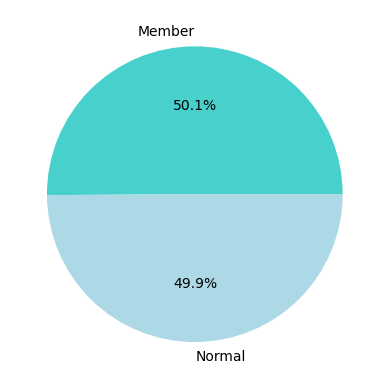

In [11]:
pie_plot('Customer type')

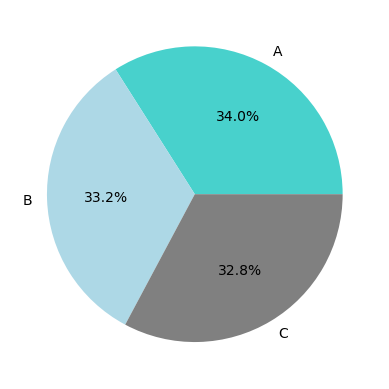

In [12]:
pie_plot('Branch')

In [13]:
colors = ['mediumturquoise','lightblue','rebeccapurple','lightpurple','lightpink','lightgreen']
def count_plot(x_axis, hue=None, rotation=0, custom_palette=None):
    if custom_palette:
        graph = sns.countplot(x=x_axis, data=df, palette=custom_palette, hue=hue, order=df[x_axis].value_counts().index)
    else:
        graph = sns.countplot(x=x_axis, data=df, palette='deep', hue=hue, order=df[x_axis].value_counts().index)

    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation=rotation)
    plt.show()

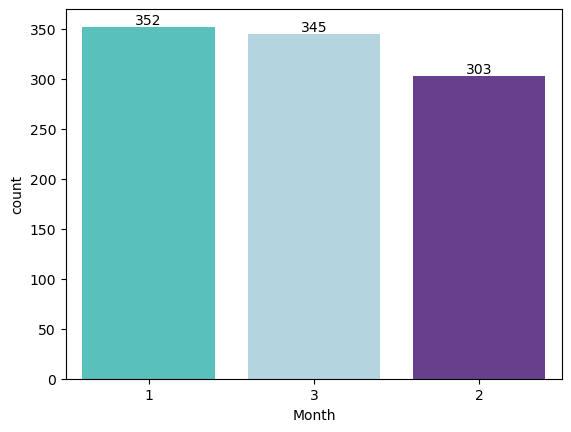

In [14]:
count_plot("Month", custom_palette=colors)

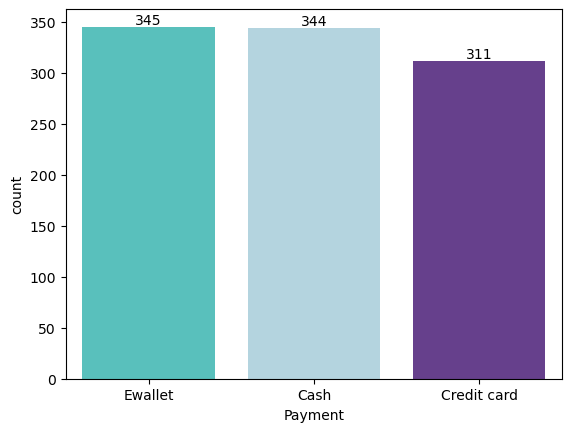

In [15]:
count_plot("Payment", custom_palette=colors)

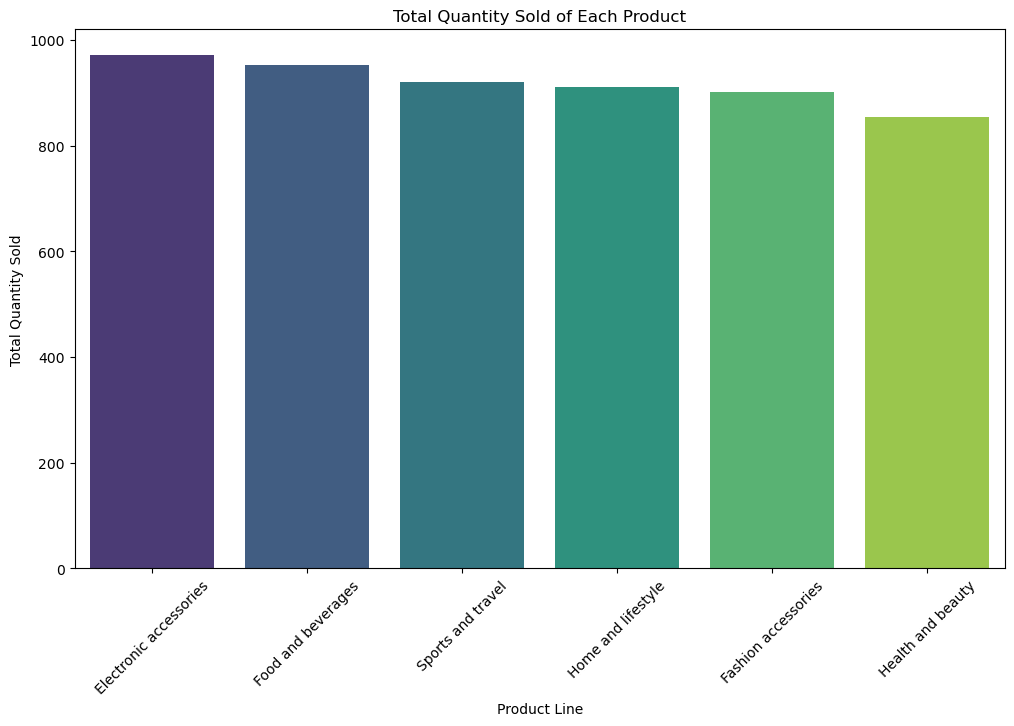

In [16]:
product_quantity = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x=product_quantity.index, y=product_quantity.values, palette='viridis')
plt.title('Total Quantity Sold of Each Product')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)  # Rotate the product names for better readability
plt.show()


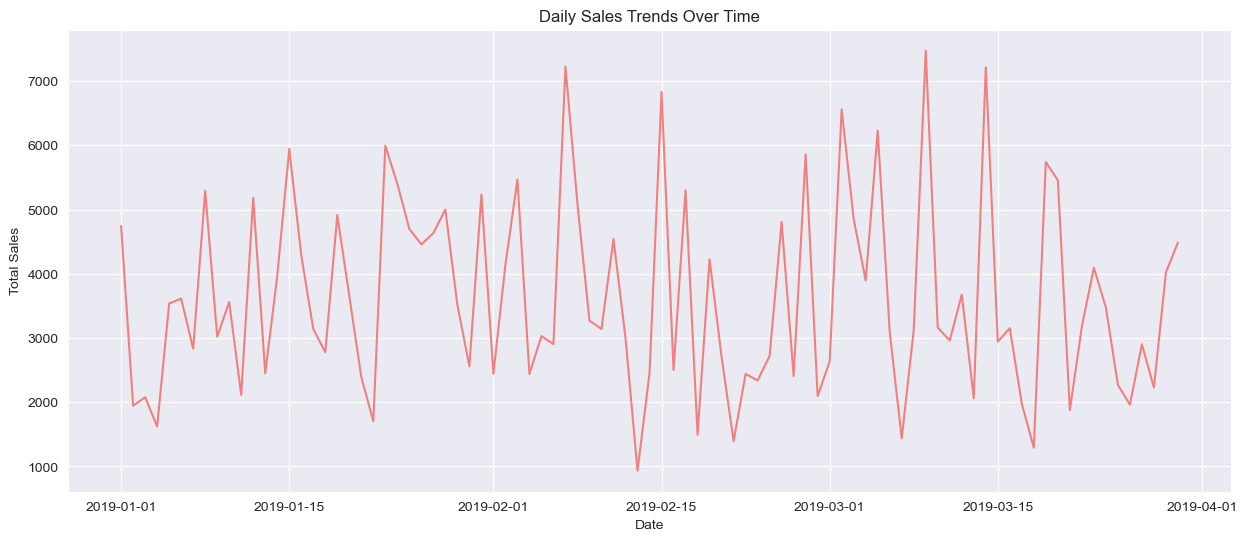

In [17]:
sns.set_style("darkgrid")

daily_sales = df.groupby('Date')['Total'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Total', data=daily_sales, color='lightcoral')
plt.title('Daily Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

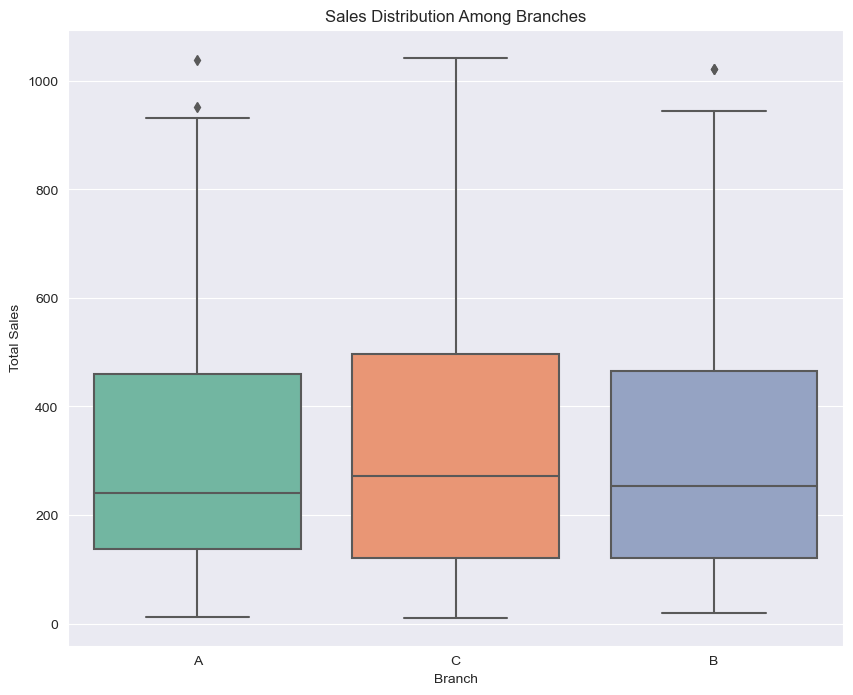

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Branch', y='Total', data=df, palette='Set2')
plt.title('Sales Distribution Among Branches')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

C:\Users\kduaa\AppData\Local\Temp\ipykernel_18480\3435840839.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hours'] = pd.to_datetime(df['Time']).dt.hour


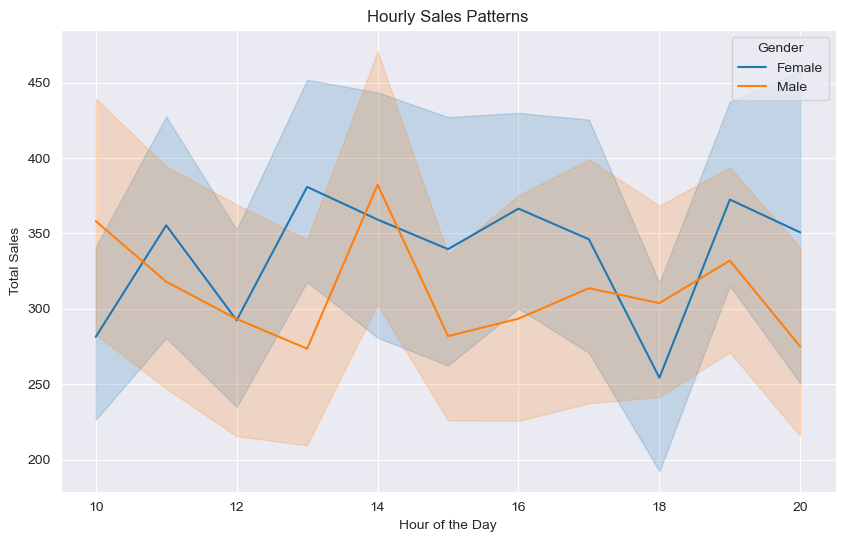

In [19]:
colors = ['maroon','palegoldenrod', 'darkcyan', 'darkviolet', 'honeydew', 'firebrick' ]
colors2 = ['plum','lightpink','thistle', 'mediumorchid', 'mediumvioletred']

df['Hours'] = pd.to_datetime(df['Time']).dt.hour
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Hours', y='Total', hue='Gender')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Hourly Sales Patterns')
plt.show()

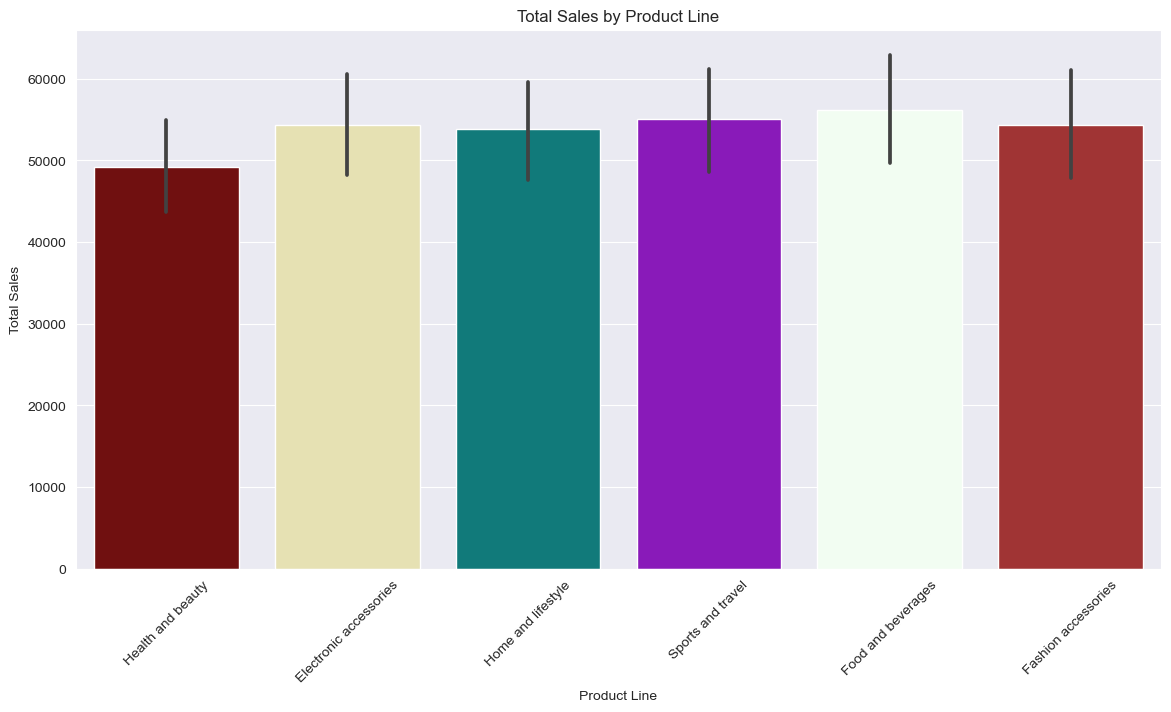

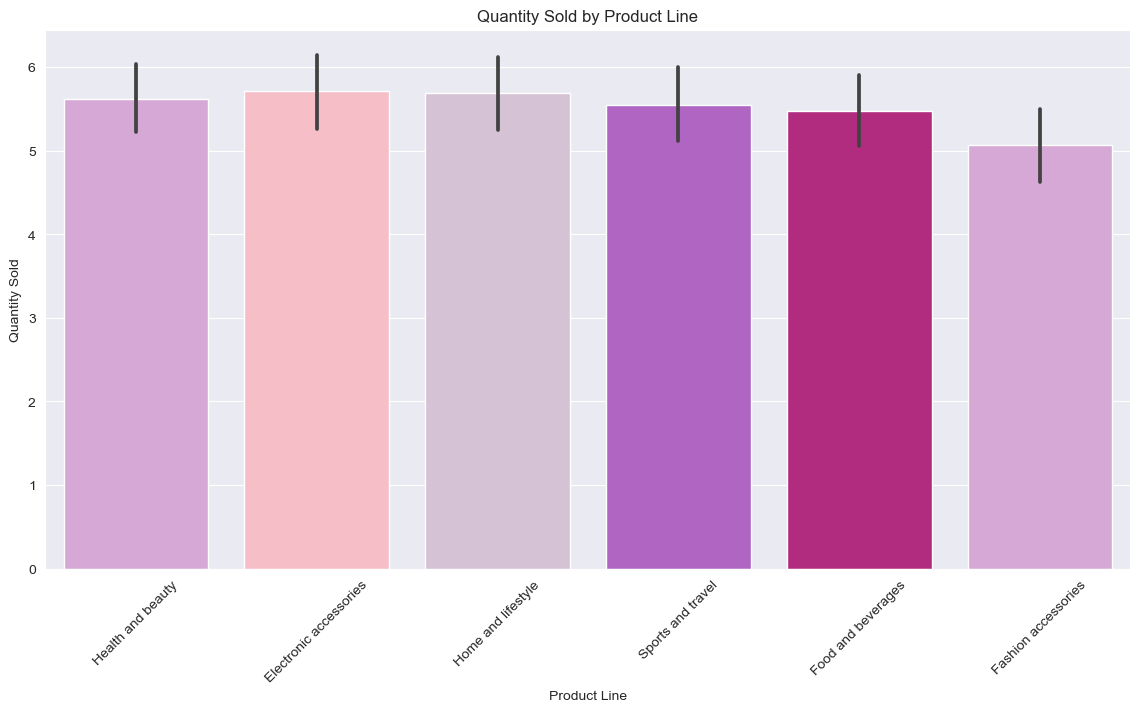

In [20]:
# Total sales by product line
plt.figure(figsize=(14, 7))
sns.barplot(x='Product line', y='Total', estimator=sum, data=df, palette = colors )
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

# Quantity sold by product line
plt.figure(figsize=(14, 7))
sns.barplot(x='Product line', y='Quantity', data=df, palette = colors2)
plt.title('Quantity Sold by Product Line')
plt.xticks(rotation=45)
plt.xlabel('Product Line')
plt.ylabel('Quantity Sold')
plt.show()

### Variable Distributions

Univariate Analysis

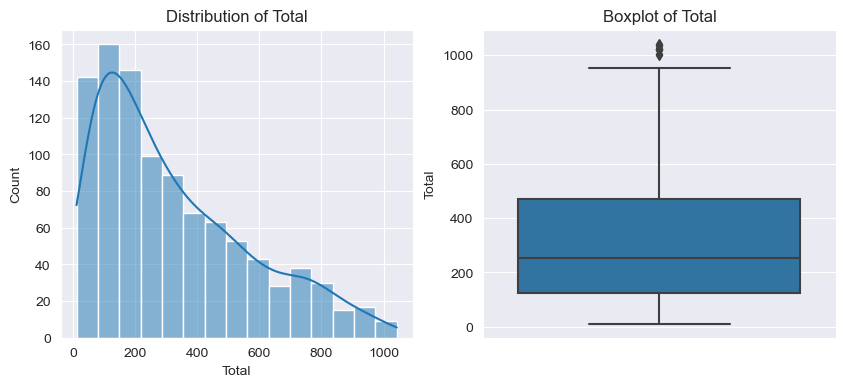

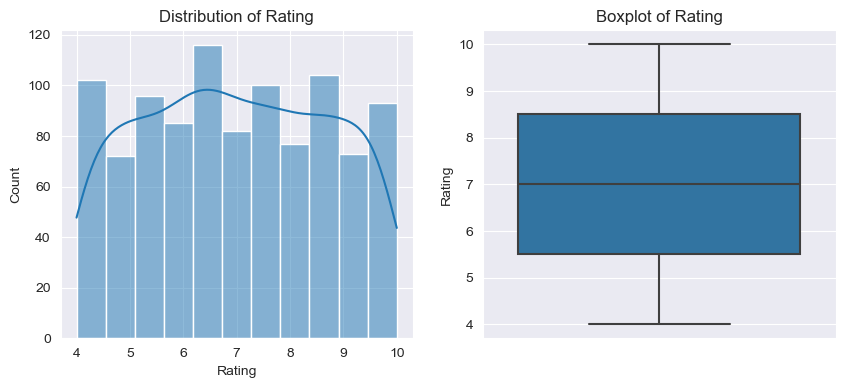

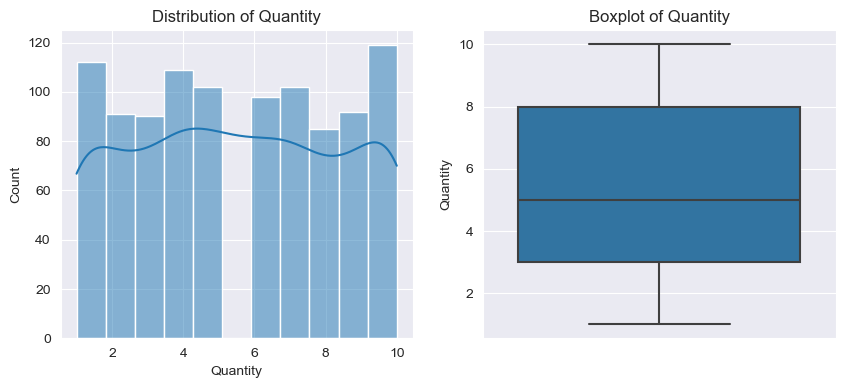

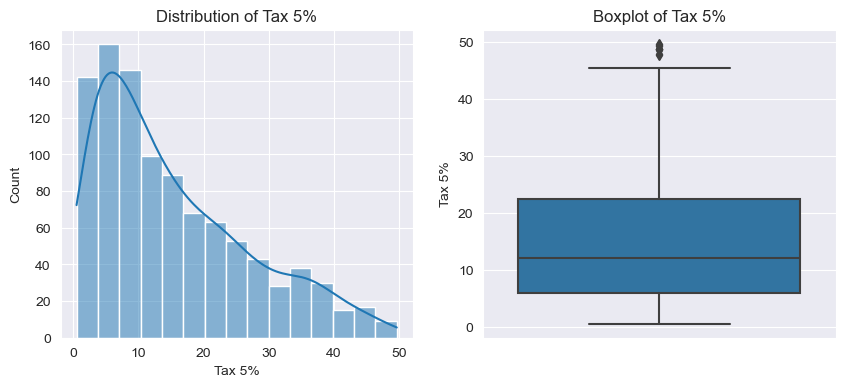

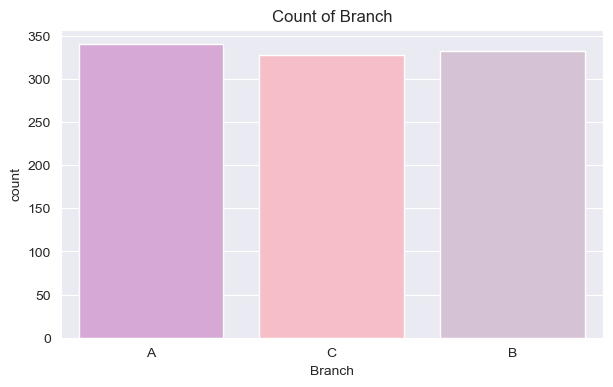

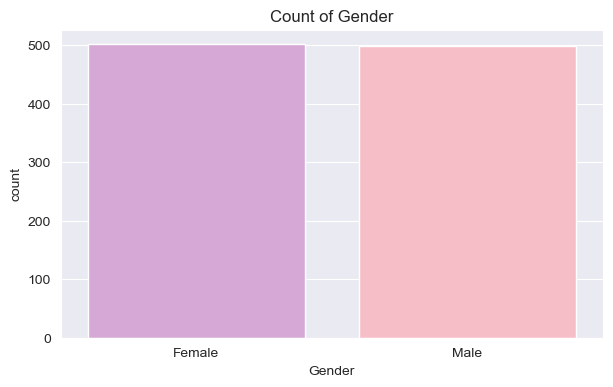

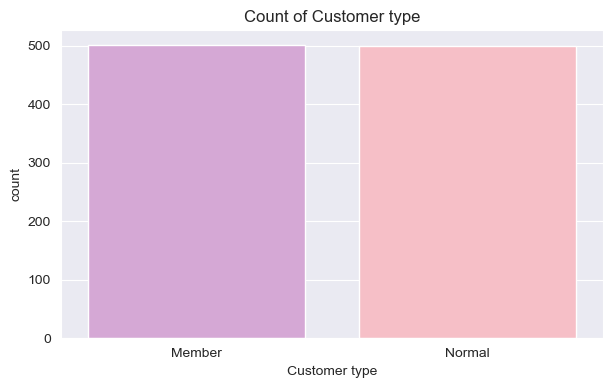

In [21]:
# Numerical Univariate Analysis
for column in ['Total', 'Rating', 'Quantity', 'Tax 5%']: 
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title('Distribution of ' + column)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title('Boxplot of ' + column)
    plt.show()

# Categorical Univariate Analysis
for column in ['Branch', 'Gender', 'Customer type']:  
    plt.figure(figsize=(7, 4))
    sns.countplot(x=column, data=df, palette = colors2)
    plt.title('Count of ' + column)
    plt.show()

Bivariate and Multivariate Analysis

C:\Users\kduaa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


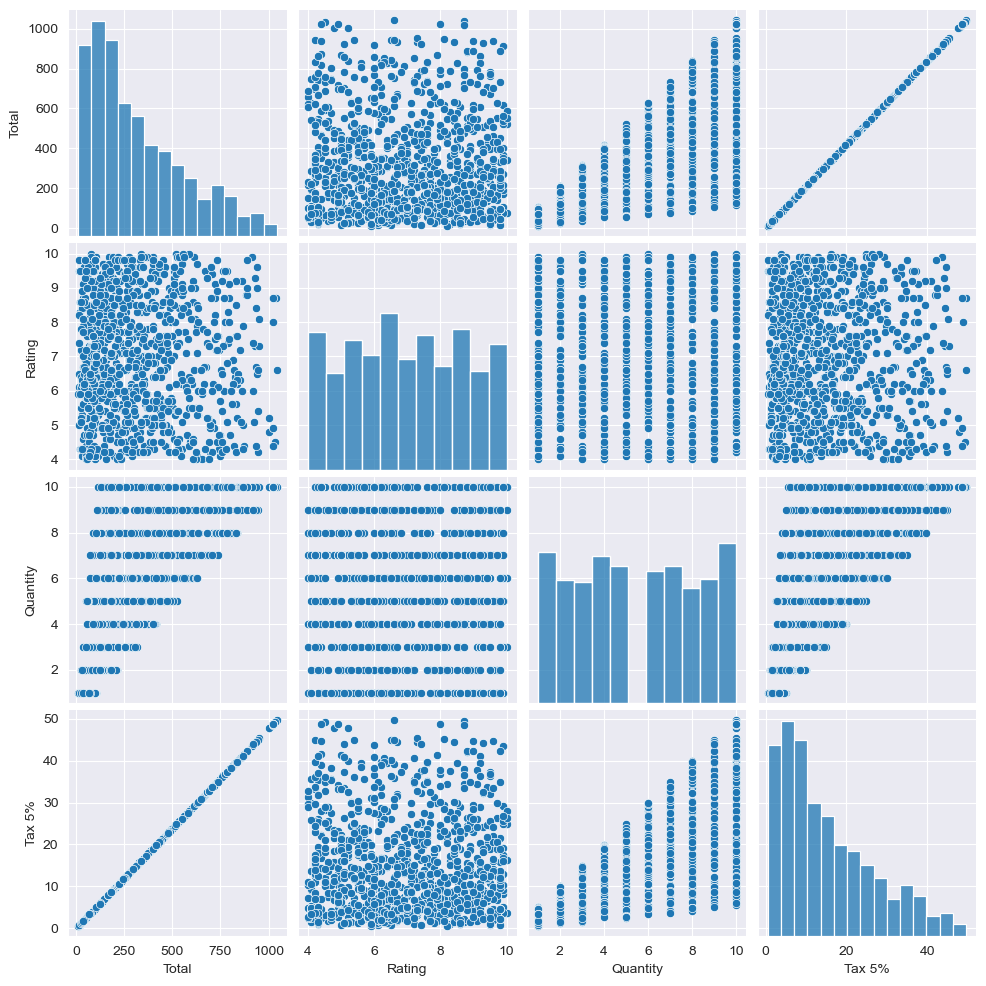

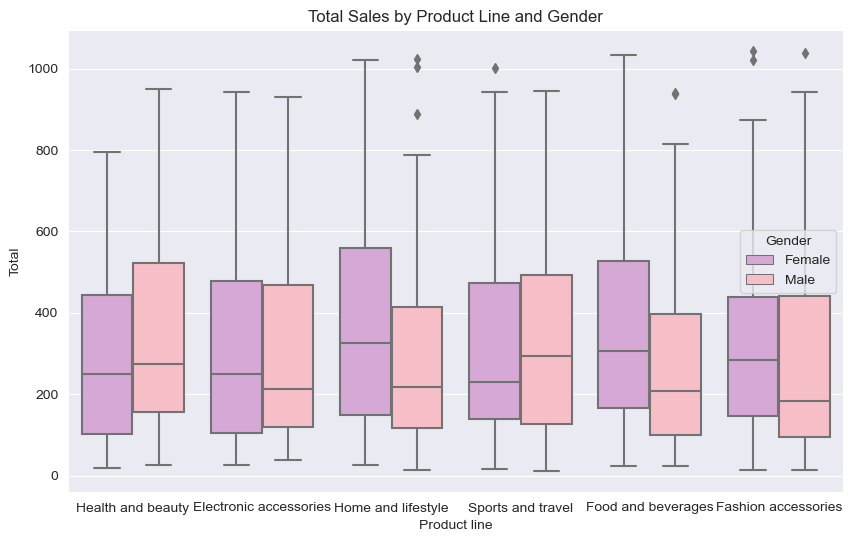

In [22]:
# Numerical Bivariate Analysis
sns.pairplot(df[['Total', 'Rating', 'Quantity', 'Tax 5%']]) 
plt.show()

# Categorical vs. Numerical Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Total', hue='Gender', data=df, palette = colors2) 
plt.title('Total Sales by Product Line and Gender')
plt.xticks()
plt.show()

# Association Rule Mining

In [23]:
transactions = df.groupby(['Time'])['Product line'].apply(list).values.tolist()

transactions

[['Fashion accessories', 'Food and beverages', 'Fashion accessories'],
 ['Sports and travel', 'Sports and travel'],
 ['Electronic accessories', 'Sports and travel', 'Food and beverages'],
 ['Sports and travel'],
 ['Sports and travel'],
 ['Health and beauty'],
 ['Fashion accessories'],
 ['Food and beverages'],
 ['Home and lifestyle'],
 ['Home and lifestyle'],
 ['Home and lifestyle',
  'Health and beauty',
  'Sports and travel',
  'Fashion accessories',
  'Sports and travel'],
 ['Health and beauty', 'Fashion accessories'],
 ['Home and lifestyle', 'Home and lifestyle'],
 ['Food and beverages', 'Home and lifestyle'],
 ['Sports and travel',
  'Electronic accessories',
  'Electronic accessories',
  'Food and beverages'],
 ['Electronic accessories', 'Health and beauty', 'Sports and travel'],
 ['Food and beverages'],
 ['Home and lifestyle'],
 ['Electronic accessories', 'Food and beverages'],
 ['Fashion accessories',
  'Electronic accessories',
  'Electronic accessories',
  'Electronic accessor

In [24]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [25]:
frequent_itemsets = apriori(df2, min_support=0.03, use_colnames=True)
# Measure Apriori
start_time = time.time()
tracemalloc.start()
apriori_time = time.time() - start_time
apriori_memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [26]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

In [27]:
frequent_itemsets

support                                       itemsets
0   0.290514                       (Electronic accessories)
1   0.308300                          (Fashion accessories)
2   0.292490                           (Food and beverages)
3   0.266798                            (Health and beauty)
4   0.266798                           (Home and lifestyle)
5   0.290514                            (Sports and travel)
6   0.073123  (Fashion accessories, Electronic accessories)
7   0.073123   (Food and beverages, Electronic accessories)
8   0.055336    (Health and beauty, Electronic accessories)
9   0.059289   (Home and lifestyle, Electronic accessories)
10  0.057312    (Sports and travel, Electronic accessories)
11  0.077075      (Food and beverages, Fashion accessories)
12  0.065217       (Health and beauty, Fashion accessories)
13  0.069170      (Home and lifestyle, Fashion accessories)
14  0.077075       (Sports and travel, Fashion accessories)
15  0.063241        (Food and beverages, Health and beauty)
16  0.065217       (Food and beverages, Home and lifestyle)
17  0.067194        (Food and beverages, Sports and travel)
18  0.057312        (Health and beauty, Home and lifestyle)
19  0.049407         (Health and beauty, Sports and travel)
20  0.055336        (Sports and travel, Home and lifestyle)

In [28]:
rules

antecedents               consequents  antecedent support  \
0      (Fashion accessories)  (Electronic accessories)            0.308300   
1   (Electronic accessories)     (Fashion accessories)            0.290514   
2       (Food and beverages)  (Electronic accessories)            0.292490   
3   (Electronic accessories)      (Food and beverages)            0.290514   
4        (Health and beauty)  (Electronic accessories)            0.266798   
5   (Electronic accessories)       (Health and beauty)            0.290514   
6       (Home and lifestyle)  (Electronic accessories)            0.266798   
7   (Electronic accessories)      (Home and lifestyle)            0.290514   
8        (Sports and travel)  (Electronic accessories)            0.290514   
9   (Electronic accessories)       (Sports and travel)            0.290514   
10      (Food and beverages)     (Fashion accessories)            0.292490   
11     (Fashion accessories)      (Food and beverages)            0.308300   
12       (Health and beauty)     (Fashion accessories)            0.266798   
13     (Fashion accessories)       (Health and beauty)            0.308300   
14      (Home and lifestyle)     (Fashion accessories)            0.266798   
15     (Fashion accessories)      (Home and lifestyle)            0.308300   
16       (Sports and travel)     (Fashion accessories)            0.290514   
17     (Fashion accessories)       (Sports and travel)            0.308300   
18      (Food and beverages)       (Health and beauty)            0.292490   
19       (Health and beauty)      (Food and beverages)            0.266798   
20      (Food and beverages)      (Home and lifestyle)            0.292490   
21      (Home and lifestyle)      (Food and beverages)            0.266798   
22      (Food and beverages)       (Sports and travel)            0.292490   
23       (Sports and travel)      (Food and beverages)            0.290514   
24       (Health and beauty)      (Home and lifestyle)            0.266798   
25      (Home and lifestyle)       (Health and beauty)            0.266798   
26       (Health and beauty)       (Sports and travel)            0.266798   
27       (Sports and travel)       (Health and beauty)            0.290514   
28       (Sports and travel)      (Home and lifestyle)            0.290514   
29      (Home and lifestyle)       (Sports and travel)            0.266798   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.290514  0.073123    0.237179  0.816414 -0.016443    0.930083   
1             0.308300  0.073123    0.251701  0.816414 -0.016443    0.924362   
2             0.290514  0.073123    0.250000  0.860544 -0.011850    0.945982   
3             0.292490  0.073123    0.251701  0.860544 -0.011850    0.945490   
4             0.290514  0.055336    0.207407  0.713933 -0.022173    0.895146   
5             0.266798  0.055336    0.190476  0.713933 -0.022173    0.905720   
6             0.290514  0.059289    0.222222  0.764928 -0.018220    0.912196   
7             0.266798  0.059289    0.204082  0.764928 -0.018220    0.921202   
8             0.290514  0.057312    0.197279  0.679069 -0.027086    0.883851   
9             0.290514  0.057312    0.197279  0.679069 -0.027086    0.883851   
10            0.308300  0.077075    0.263514  0.854730 -0.013100    0.939188   
11            0.292490  0.077075    0.250000  0.854730 -0.013100    0.943347   
12            0.308300  0.065217    0.244444  0.792877 -0.017037    0.915485   
13            0.266798  0.065217    0.211538  0.792877 -0.017037    0.929914   
14            0.308300  0.069170    0.259259  0.840931 -0.013084    0.933794   
15            0.266798  0.069170    0.224359  0.840931 -0.013084    0.945285   
16            0.308300  0.077075    0.265306  0.860544 -0.012490    0.941480   
17            0.290514  0.077075    0.250000  0.860544 -0.012490    0.945982   
18            0.266798  0.063241    0.216216  0.810410 -0.014795    0.935464  

In [29]:
print("Rules sorted by Lift:")
print(rules.sort_values('lift', ascending=False).head())

print("\nRules sorted by Confidence:")
print(rules.sort_values('confidence', ascending=False).head())

print("\nRules sorted by Support:")
print(rules.sort_values('support', ascending=False).head())


Rules sorted by Lift:
                 antecedents               consequents  antecedent support  \
2       (Food and beverages)  (Electronic accessories)            0.292490   
3   (Electronic accessories)      (Food and beverages)            0.290514   
17     (Fashion accessories)       (Sports and travel)            0.308300   
16       (Sports and travel)     (Fashion accessories)            0.290514   
11     (Fashion accessories)      (Food and beverages)            0.308300   

    consequent support   support  confidence      lift  leverage  conviction  \
2             0.290514  0.073123    0.250000  0.860544  -0.01185    0.945982   
3             0.292490  0.073123    0.251701  0.860544  -0.01185    0.945490   
17            0.290514  0.077075    0.250000  0.860544  -0.01249    0.945982   
16            0.308300  0.077075    0.265306  0.860544  -0.01249    0.941480   
11            0.292490  0.077075    0.250000  0.854730  -0.01310    0.943347   

    zhangs_metric  
2       

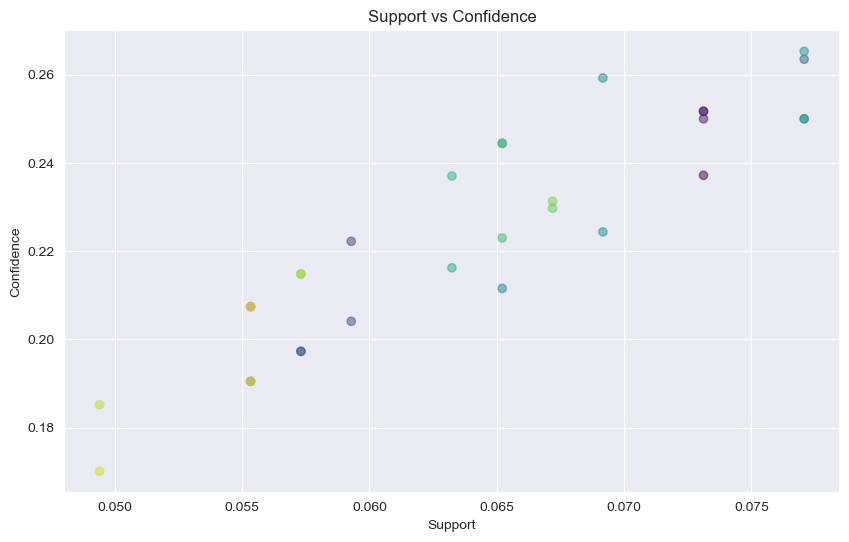

In [30]:
plt.figure(figsize=(10,6))
custom_colors = range(len(rules))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, c=custom_colors, cmap='viridis')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


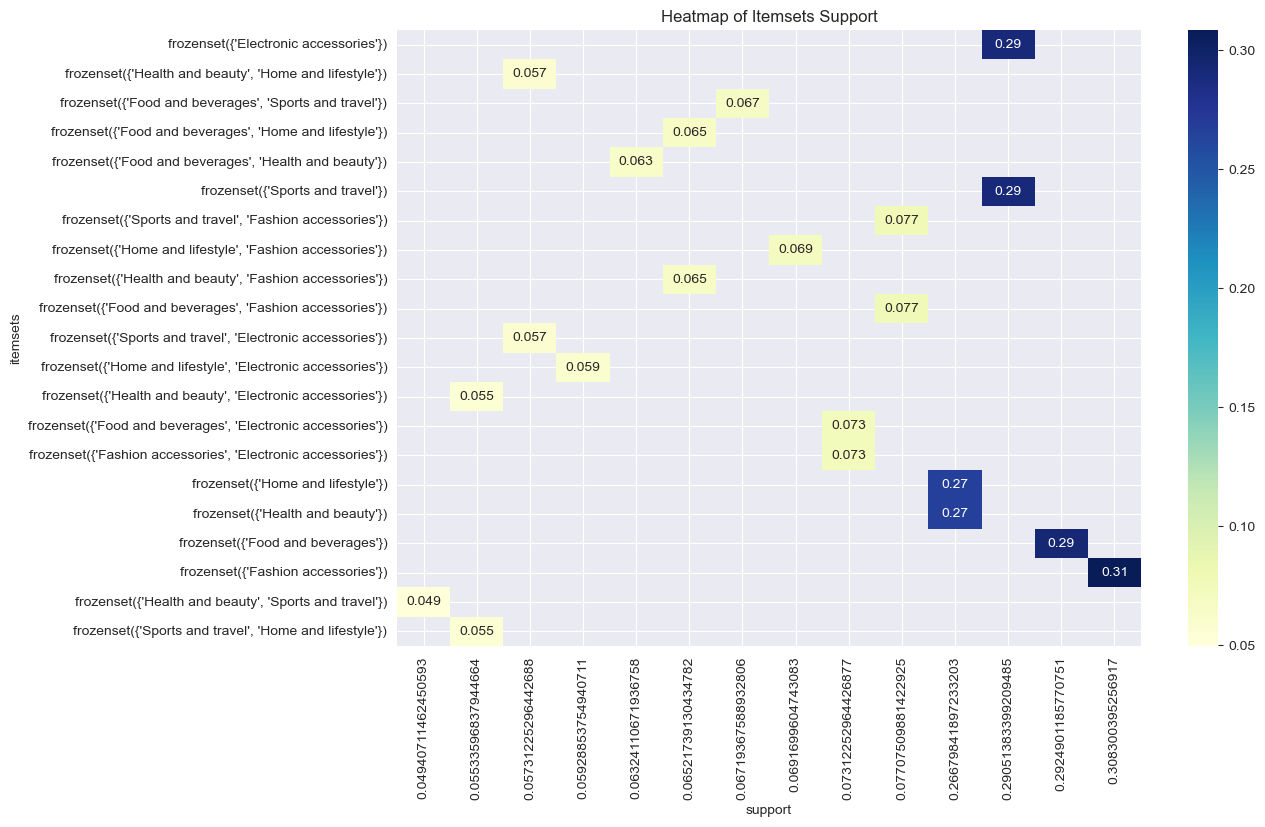

In [31]:
pivot = frequent_itemsets.pivot(index='itemsets', columns='support', values='support')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Itemsets Support')
plt.show()

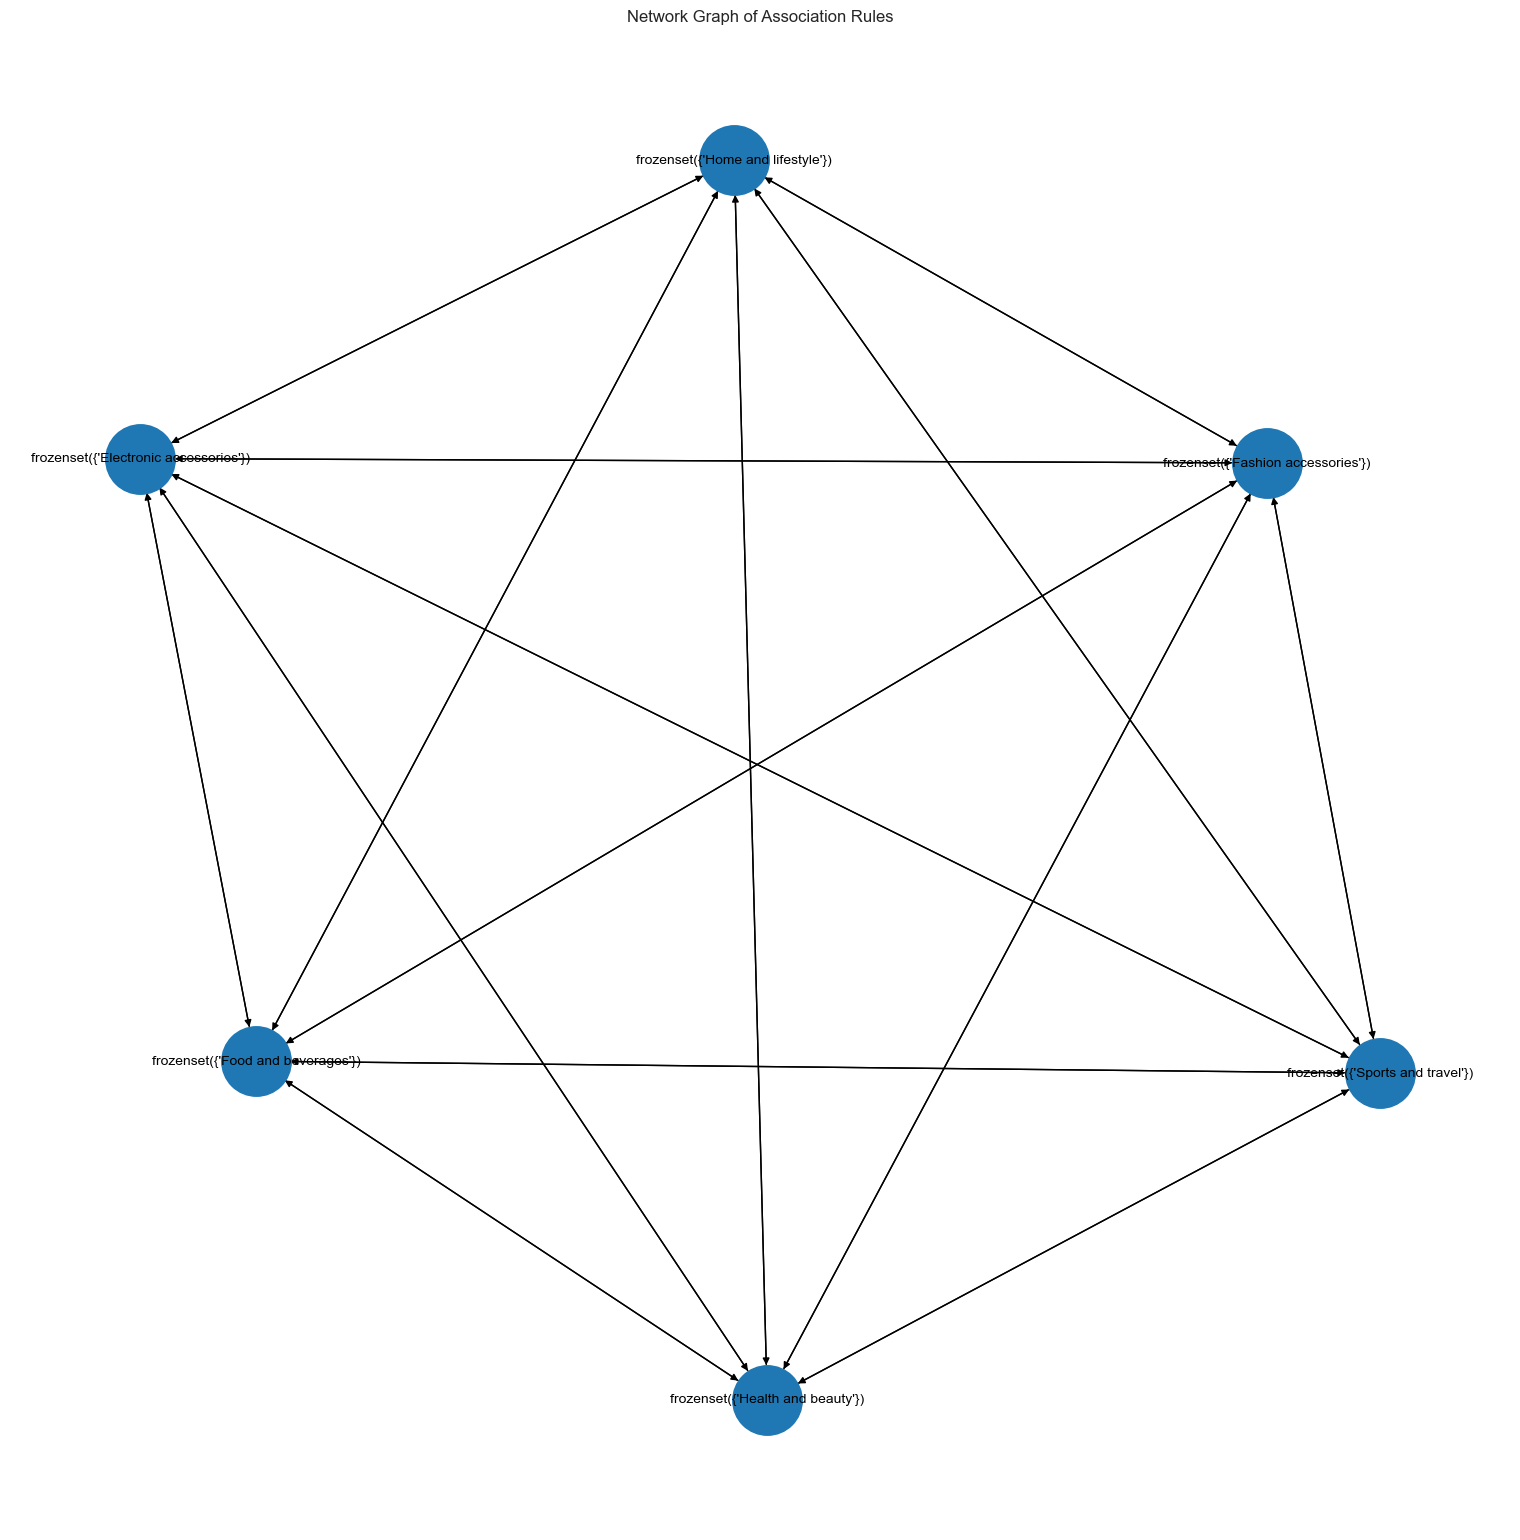

In [32]:
G = nx.DiGraph()

for i, row in rules.iterrows():
    G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['lift'])

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.9) 
nx.draw(G, with_labels=True, pos=pos, node_size=2500, edge_color='black', linewidths=1, font_size=10)
plt.title('Network Graph of Association Rules')
plt.show()

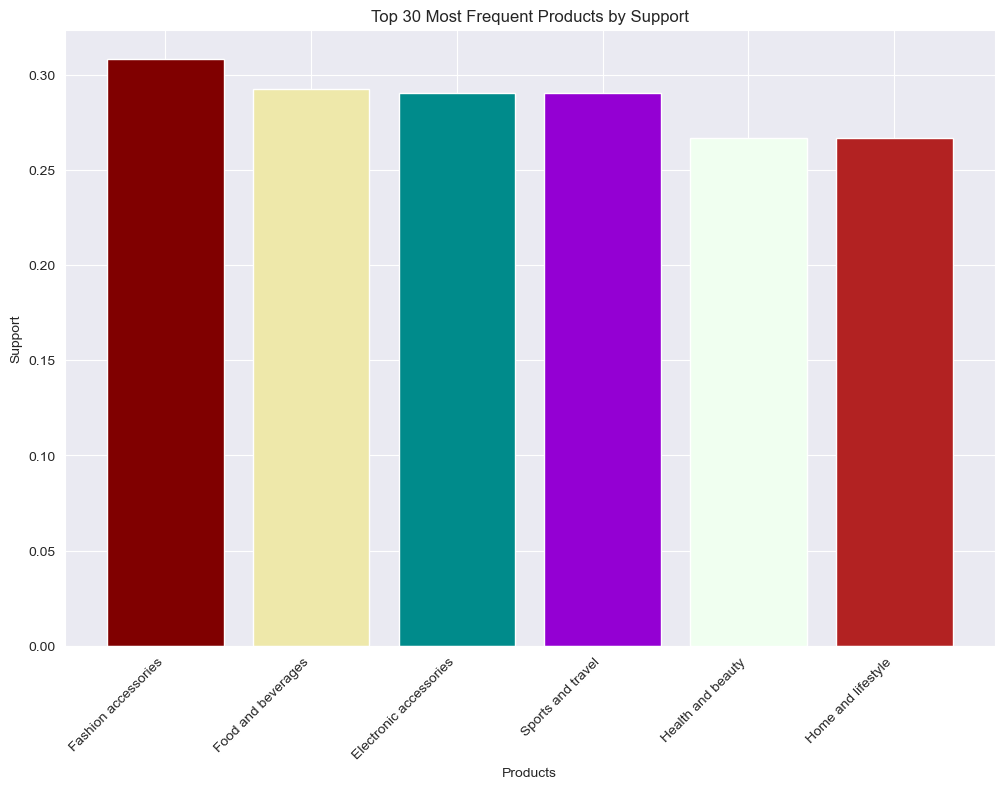

In [33]:
frequent_itemsets['itemset_str'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

single_items = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]

single_items_sorted = single_items.sort_values(by='support', ascending=False)

N = 30
plt.figure(figsize=(12, 8))
plt.bar(single_items_sorted['itemset_str'].head(N), single_items_sorted['support'].head(N), color= colors)
plt.title('Top {} Most Frequent Products by Support'.format(N))
plt.ylabel('Support')
plt.xlabel('Products')
plt.xticks(rotation=45, ha='right')  
plt.show()

# Comparative Analysis with FP Growth Algorithm

In [34]:
frequent_itemsets2 = fpgrowth(df2, min_support=0.03, use_colnames=True)
# Measure FP-Growth
start_time = time.time()
tracemalloc.start()
fpgrowth_time = time.time() - start_time
fpgrowth_memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [35]:
frequent_itemsets2

support                                       itemsets
0   0.308300                          (Fashion accessories)
1   0.292490                           (Food and beverages)
2   0.290514                            (Sports and travel)
3   0.290514                       (Electronic accessories)
4   0.266798                            (Health and beauty)
5   0.266798                           (Home and lifestyle)
6   0.077075      (Food and beverages, Fashion accessories)
7   0.067194        (Food and beverages, Sports and travel)
8   0.077075       (Sports and travel, Fashion accessories)
9   0.073123   (Food and beverages, Electronic accessories)
10  0.057312    (Sports and travel, Electronic accessories)
11  0.073123  (Fashion accessories, Electronic accessories)
12  0.065217       (Health and beauty, Fashion accessories)
13  0.057312        (Health and beauty, Home and lifestyle)
14  0.049407         (Health and beauty, Sports and travel)
15  0.055336    (Health and beauty, Electronic accessories)
16  0.063241        (Food and beverages, Health and beauty)
17  0.069170      (Home and lifestyle, Fashion accessories)
18  0.055336        (Sports and travel, Home and lifestyle)
19  0.065217       (Food and beverages, Home and lifestyle)
20  0.059289   (Home and lifestyle, Electronic accessories)

In [36]:
rules2 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)  

In [37]:
rules2

antecedents               consequents  antecedent support  \
0      (Fashion accessories)  (Electronic accessories)            0.308300   
1   (Electronic accessories)     (Fashion accessories)            0.290514   
2       (Food and beverages)  (Electronic accessories)            0.292490   
3   (Electronic accessories)      (Food and beverages)            0.290514   
4        (Health and beauty)  (Electronic accessories)            0.266798   
5   (Electronic accessories)       (Health and beauty)            0.290514   
6       (Home and lifestyle)  (Electronic accessories)            0.266798   
7   (Electronic accessories)      (Home and lifestyle)            0.290514   
8        (Sports and travel)  (Electronic accessories)            0.290514   
9   (Electronic accessories)       (Sports and travel)            0.290514   
10      (Food and beverages)     (Fashion accessories)            0.292490   
11     (Fashion accessories)      (Food and beverages)            0.308300   
12       (Health and beauty)     (Fashion accessories)            0.266798   
13     (Fashion accessories)       (Health and beauty)            0.308300   
14      (Home and lifestyle)     (Fashion accessories)            0.266798   
15     (Fashion accessories)      (Home and lifestyle)            0.308300   
16       (Sports and travel)     (Fashion accessories)            0.290514   
17     (Fashion accessories)       (Sports and travel)            0.308300   
18      (Food and beverages)       (Health and beauty)            0.292490   
19       (Health and beauty)      (Food and beverages)            0.266798   
20      (Food and beverages)      (Home and lifestyle)            0.292490   
21      (Home and lifestyle)      (Food and beverages)            0.266798   
22      (Food and beverages)       (Sports and travel)            0.292490   
23       (Sports and travel)      (Food and beverages)            0.290514   
24       (Health and beauty)      (Home and lifestyle)            0.266798   
25      (Home and lifestyle)       (Health and beauty)            0.266798   
26       (Health and beauty)       (Sports and travel)            0.266798   
27       (Sports and travel)       (Health and beauty)            0.290514   
28       (Sports and travel)      (Home and lifestyle)            0.290514   
29      (Home and lifestyle)       (Sports and travel)            0.266798   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.290514  0.073123    0.237179  0.816414 -0.016443    0.930083   
1             0.308300  0.073123    0.251701  0.816414 -0.016443    0.924362   
2             0.290514  0.073123    0.250000  0.860544 -0.011850    0.945982   
3             0.292490  0.073123    0.251701  0.860544 -0.011850    0.945490   
4             0.290514  0.055336    0.207407  0.713933 -0.022173    0.895146   
5             0.266798  0.055336    0.190476  0.713933 -0.022173    0.905720   
6             0.290514  0.059289    0.222222  0.764928 -0.018220    0.912196   
7             0.266798  0.059289    0.204082  0.764928 -0.018220    0.921202   
8             0.290514  0.057312    0.197279  0.679069 -0.027086    0.883851   
9             0.290514  0.057312    0.197279  0.679069 -0.027086    0.883851   
10            0.308300  0.077075    0.263514  0.854730 -0.013100    0.939188   
11            0.292490  0.077075    0.250000  0.854730 -0.013100    0.943347   
12            0.308300  0.065217    0.244444  0.792877 -0.017037    0.915485   
13            0.266798  0.065217    0.211538  0.792877 -0.017037    0.929914   
14            0.308300  0.069170    0.259259  0.840931 -0.013084    0.933794   
15            0.266798  0.069170    0.224359  0.840931 -0.013084    0.945285   
16            0.308300  0.077075    0.265306  0.860544 -0.012490    0.941480   
17            0.290514  0.077075    0.250000  0.860544 -0.012490    0.945982   
18            0.266798  0.063241    0.216216  0.810410 -0.014795    0.935464  

In [38]:
print(f"Apriori Time: {apriori_time} seconds")
print(f"Apriori Memory: {apriori_memory[1] - apriori_memory[0]} bytes")
print(f"FP-Growth Time: {fpgrowth_time} seconds")
print(f"FP-Growth Memory: {fpgrowth_memory[1] - fpgrowth_memory[0]} bytes")


Apriori Time: 0.005930662155151367 seconds
Apriori Memory: 10989 bytes
FP-Growth Time: 0.0 seconds
FP-Growth Memory: 10989 bytes


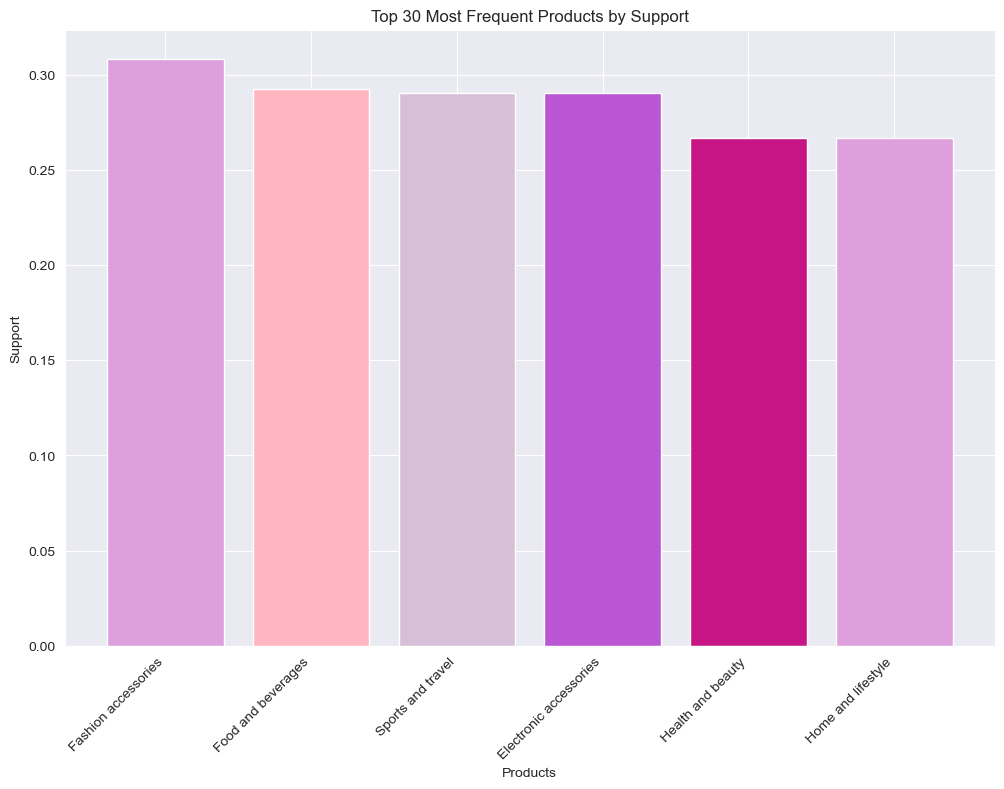

In [39]:
frequent_itemsets2['itemset_str'] = frequent_itemsets2['itemsets'].apply(lambda x: ', '.join(list(x)))

single_items = frequent_itemsets2[frequent_itemsets2['itemsets'].apply(lambda x: len(x) == 1)]

single_items_sorted = single_items.sort_values(by='support', ascending=False)

N = 30
plt.figure(figsize=(12, 8))
plt.bar(single_items_sorted['itemset_str'].head(N), single_items_sorted['support'].head(N), color= colors2)
plt.title('Top {} Most Frequent Products by Support'.format(N))
plt.ylabel('Support')
plt.xlabel('Products')
plt.xticks(rotation=45, ha='right')  
plt.show()

#  Tracking Patterns and Customer Behavior Analysis

In [40]:
df['YearMonth'] = df['Date'].dt.to_period('M')

frequent_itemsets_time = {}
for period, group in df.groupby('YearMonth'):
    # Find frequent itemsets for the current time segment
    frequent_itemsets_time[period] = frequent_itemsets2
frequent_itemsets_time

{Period('2019-01', 'M'):      support                                       itemsets  \
 0   0.308300                          (Fashion accessories)   
 1   0.292490                           (Food and beverages)   
 2   0.290514                            (Sports and travel)   
 3   0.290514                       (Electronic accessories)   
 4   0.266798                            (Health and beauty)   
 5   0.266798                           (Home and lifestyle)   
 6   0.077075      (Food and beverages, Fashion accessories)   
 7   0.067194        (Food and beverages, Sports and travel)   
 8   0.077075       (Sports and travel, Fashion accessories)   
 9   0.073123   (Food and beverages, Electronic accessories)   
 10  0.057312    (Sports and travel, Electronic accessories)   
 11  0.073123  (Fashion accessories, Electronic accessories)   
 12  0.065217       (Health and beauty, Fashion accessories)   
 13  0.057312        (Health and beauty, Home and lifestyle)   
 14  0.049407   

In [41]:
def compare_itemsets(itemsets1, itemsets2):
    itemsets1 = {frozenset(item): support for item, support in itemsets1[['itemsets', 'support']].values}
    itemsets2 = {frozenset(item): support for item, support in itemsets2[['itemsets', 'support']].values}
    
    new_itemsets = set(itemsets2) - set(itemsets1)
    disappeared_itemsets = set(itemsets1) - set(itemsets2)
    
    existing_itemsets = set(itemsets1) & set(itemsets2)
    changed_support = {item: itemsets2[item] - itemsets1[item] for item in existing_itemsets}
    
    return new_itemsets, disappeared_itemsets, existing_itemsets, changed_support


In [42]:
time_segments = frequent_itemsets_time.keys()
time_segments

dict_keys([Period('2019-01', 'M'), Period('2019-02', 'M'), Period('2019-03', 'M')])

In [43]:
time_segment1 = pd.Period('2019-01', freq='M')
time_segment2 = pd.Period('2019-02', freq='M')

itemsets1 = frequent_itemsets_time[time_segment1]
itemsets2 = frequent_itemsets_time[time_segment2]

In [44]:
new_itemsets, disappeared_itemsets, existing_itemsets, changed_support = compare_itemsets(itemsets1, itemsets2)

In [45]:
# Convert set of frozensets to a list of strings for better display
new_itemsets_list = [', '.join(item) for item in new_itemsets]
disappeared_itemsets_list = [', '.join(item) for item in disappeared_itemsets]
existing_itemsets_list = [', '.join(item) for item in existing_itemsets]

# Changed support might need more formatting for better clarity
changed_support_list = [(', '.join(item), round(support_change, 4)) for item, support_change in changed_support.items()]

# Print using tabulate
print("New Itemsets in the Second Segment:")
print(tabulate(enumerate(new_itemsets_list, 1), headers=['#', 'Itemset']))

print("\nDisappeared Itemsets from the First Segment:")
print(tabulate(enumerate(disappeared_itemsets_list, 1), headers=['#', 'Itemset']))

print("\nExisting Itemsets:")
print(tabulate(enumerate(existing_itemsets_list, 1), headers=['#', 'Itemset']))

print("\nChanged Support for Existing Itemsets:")
print(tabulate(enumerate(changed_support_list, 1), headers=['#', 'Itemset', 'Change in Support']))


New Itemsets in the Second Segment:
#    Itemset
---  ---------

Disappeared Itemsets from the First Segment:
#    Itemset
---  ---------

Existing Itemsets:
  #  Itemset
---  -------------------------------------------
  1  Health and beauty, Home and lifestyle
  2  Fashion accessories, Electronic accessories
  3  Fashion accessories
  4  Electronic accessories
  5  Food and beverages, Electronic accessories
  6  Health and beauty
  7  Food and beverages
  8  Home and lifestyle, Fashion accessories
  9  Home and lifestyle, Electronic accessories
 10  Home and lifestyle
 11  Food and beverages, Health and beauty
 12  Food and beverages, Home and lifestyle
 13  Food and beverages, Fashion accessories
 14  Health and beauty, Fashion accessories
 15  Food and beverages, Sports and travel
 16  Health and beauty, Sports and travel
 17  Sports and travel, Fashion accessories
 18  Sports and travel, Electronic accessories
 19  Sports and travel
 20  Health and beauty, Electronic accessories
 

C:\Users\kduaa\AppData\Local\Temp\ipykernel_18480\3000425808.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Change in Support')


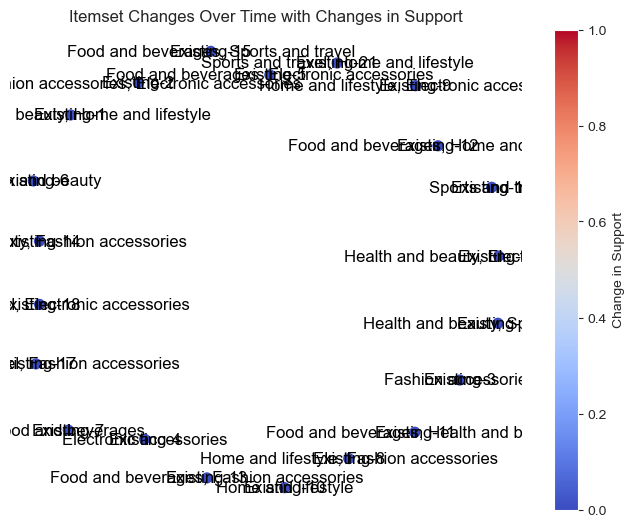

In [46]:
G = nx.Graph()

# Add nodes for each itemset
for idx, itemset in enumerate(existing_itemsets, start=1):
    G.add_node(f"Existing-{idx}", label=', '.join(itemset), change=0)  # Initialize with no change

for idx, itemset in enumerate(new_itemsets, start=1):
    G.add_node(f"New-{idx}", label=', '.join(itemset), change=0)  # New itemsets might not have a 'change' metric

for idx, itemset in enumerate(disappeared_itemsets, start=1):
    G.add_node(f"Disappeared-{idx}", label=', '.join(itemset), change=0)  # Disappeared itemsets might not have a 'change' metric

# Update nodes that have a change in support
for itemset, change in changed_support.items():
    node_label = next((node for node, data in G.nodes(data=True) if data['label'] == ', '.join(itemset)), None)
    if node_label:
        G.nodes[node_label]['change'] = change

# Now create color and size arrays matching the number of nodes
changes = [G.nodes[node]['change'] for node in G.nodes]
colors = changes
sizes = [50 + 10 * abs(change) for change in changes]  # Example to scale sizes; customize as needed

# Position the nodes using one of the layout algorithms
pos = nx.spring_layout(G)

# Draw the nodes with size and color
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=sizes, cmap=plt.cm.coolwarm, edge_color="gray")

# Adding labels
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.title('Itemset Changes Over Time with Changes in Support')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Change in Support')
plt.show()

In [47]:
pos = nx.spring_layout(G)  
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    text.append(G.nodes[node]['label'])

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        color=colors,
        size=sizes,
        colorbar=dict(
            thickness=15,
            title='Change in Support',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph of itemset changes over time',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code powered by Plotly",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()


C:\Users\kduaa\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\kduaa\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [48]:
comparison_results = {}

segments = sorted(frequent_itemsets_time.keys())

for i in range(len(segments)-1):
    segment1, segment2 = segments[i], segments[i+1]
    comparison = compare_itemsets(frequent_itemsets_time[segment1], frequent_itemsets_time[segment2])
    comparison_results[(segment1, segment2)] = comparison
comparison_results

{(Period('2019-01', 'M'), Period('2019-02', 'M')): (set(),
  set(),
  {frozenset({'Health and beauty', 'Home and lifestyle'}),
   frozenset({'Fashion accessories'}),
   frozenset({'Electronic accessories'}),
   frozenset({'Electronic accessories', 'Fashion accessories'}),
   frozenset({'Electronic accessories', 'Food and beverages'}),
   frozenset({'Health and beauty'}),
   frozenset({'Food and beverages'}),
   frozenset({'Home and lifestyle'}),
   frozenset({'Fashion accessories', 'Home and lifestyle'}),
   frozenset({'Electronic accessories', 'Home and lifestyle'}),
   frozenset({'Food and beverages', 'Health and beauty'}),
   frozenset({'Food and beverages', 'Home and lifestyle'}),
   frozenset({'Fashion accessories', 'Food and beverages'}),
   frozenset({'Fashion accessories', 'Health and beauty'}),
   frozenset({'Sports and travel'}),
   frozenset({'Food and beverages', 'Sports and travel'}),
   frozenset({'Health and beauty', 'Sports and travel'}),
   frozenset({'Fashion accessor

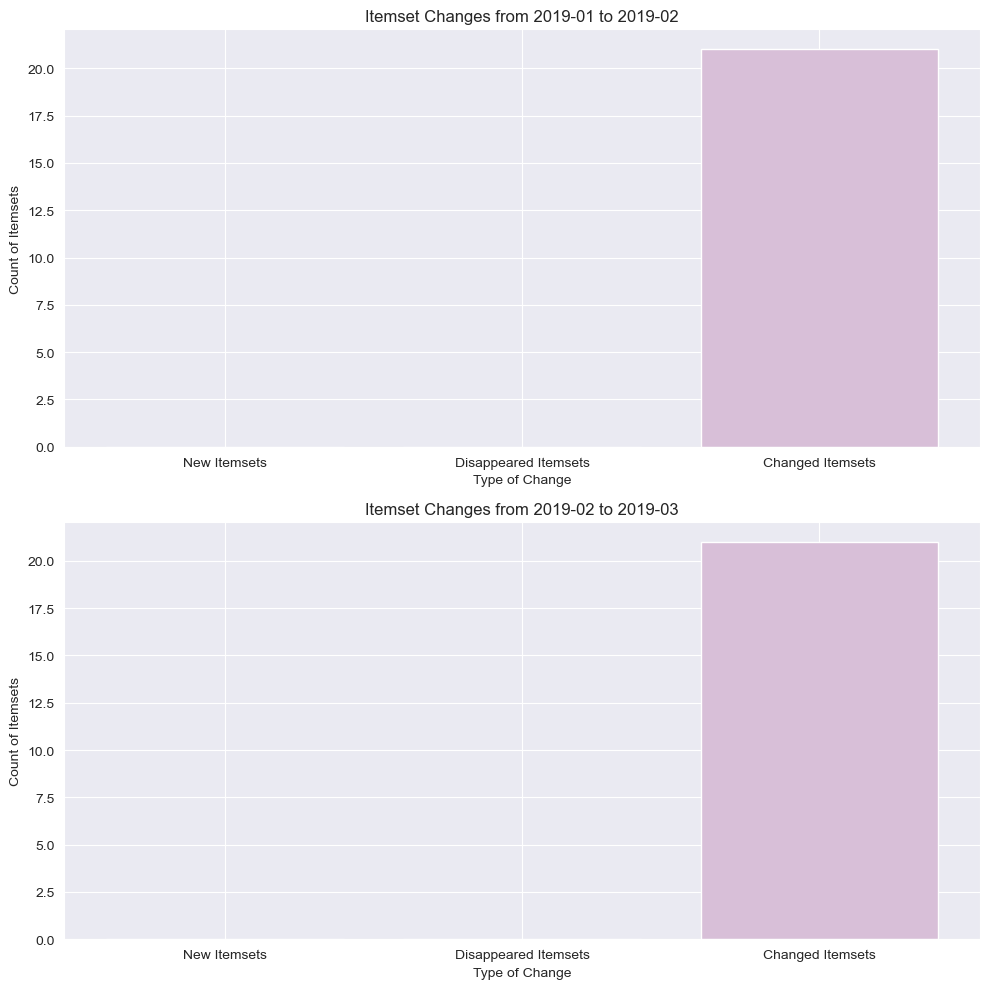

In [49]:
fig, axes = plt.subplots(nrows=len(comparison_results), ncols=1, figsize=(10, len(comparison_results) * 5))

if len(comparison_results) == 1:  
    axes = [axes]

for ax, ((segment1, segment2), (new, disappeared, existing, changed)) in zip(axes, comparison_results.items()):
    counts = [len(new), len(disappeared), len(changed)]
    labels = ['New Itemsets', 'Disappeared Itemsets', 'Changed Itemsets']

    ax.bar(labels, counts, color=colors2)
    
    ax.set_title(f"Itemset Changes from {segment1} to {segment2}")
    ax.set_ylabel('Count of Itemsets')
    ax.set_xlabel('Type of Change')

plt.tight_layout()
plt.show()


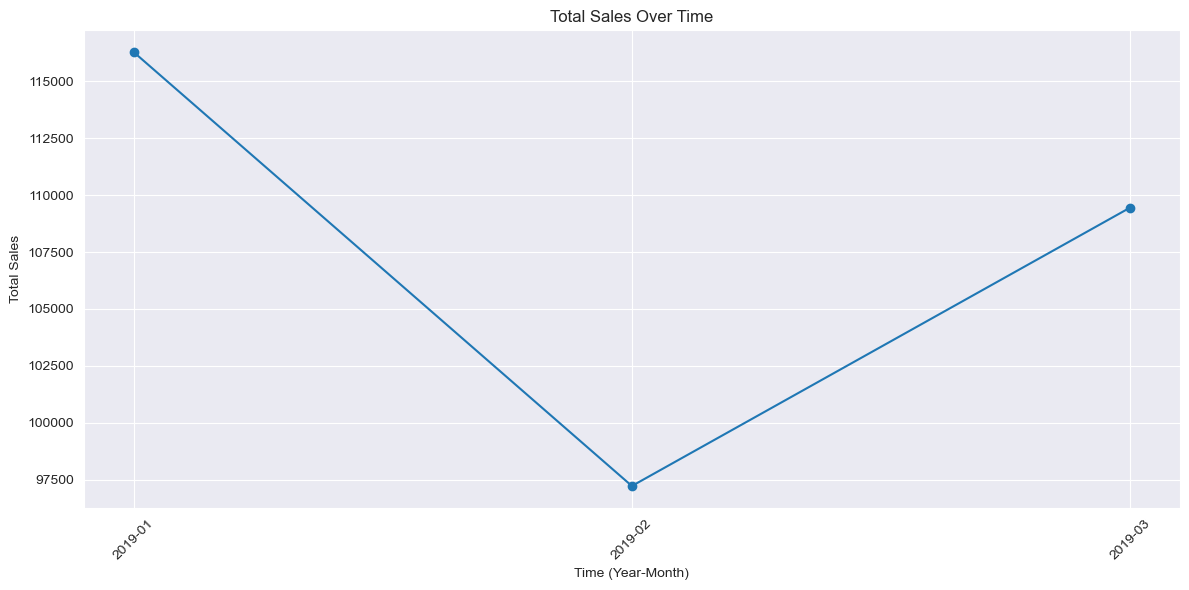

In [50]:
total_sales_time = df.groupby('YearMonth')['Total'].sum()

plt.figure(figsize=(12, 6))
plt.plot(total_sales_time.index.astype(str), total_sales_time.values, marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.grid(visible=True)
plt.tight_layout()
plt.show()

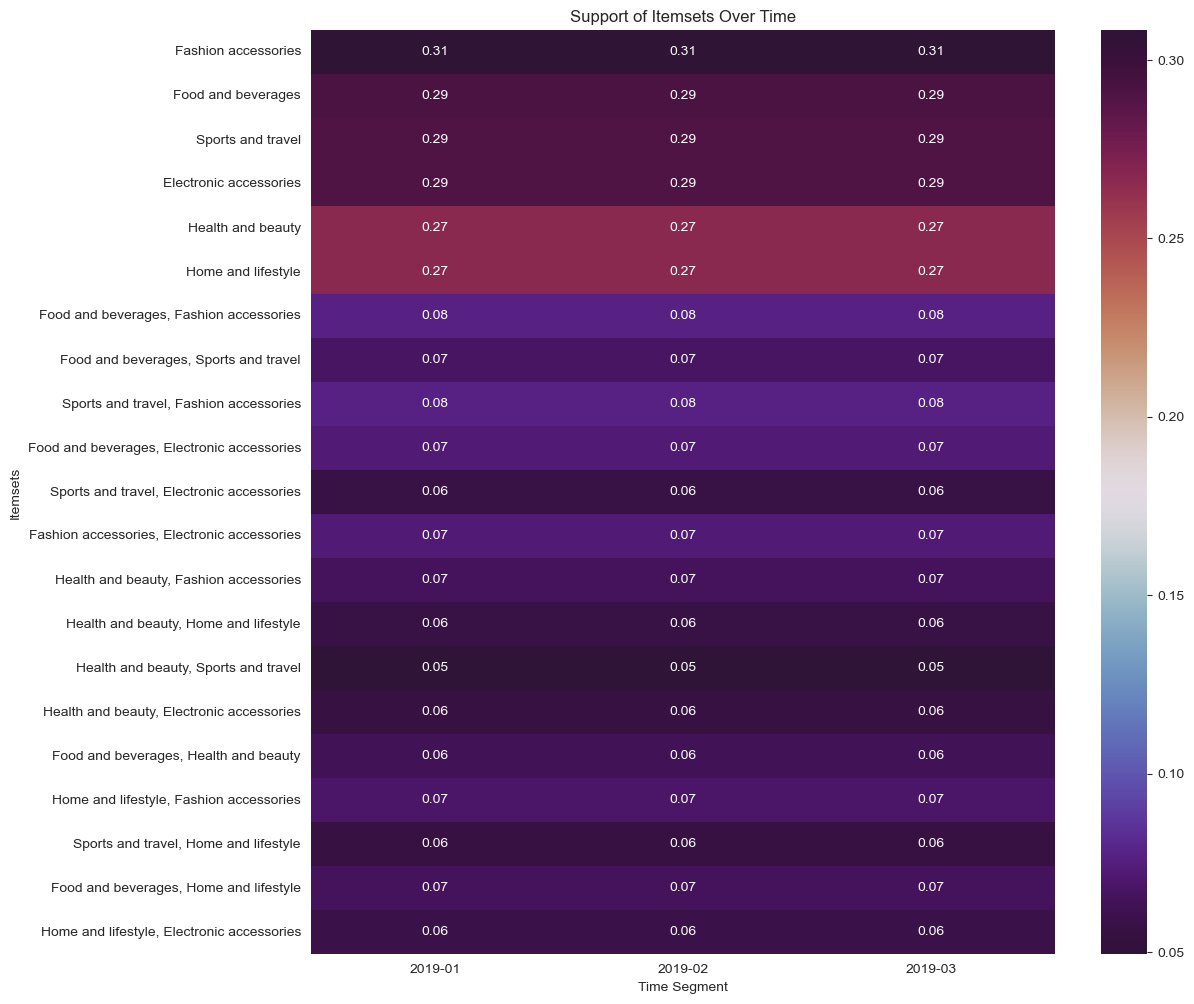

In [51]:
support_data = pd.DataFrame()
for segment, itemsets in frequent_itemsets_time.items():
    itemsets['itemset_str'] = itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
    for _, row in itemsets.iterrows():
        support_data.loc[row['itemset_str'], segment] = row['support']

support_data = support_data.fillna(0)

plt.figure(figsize=(12, 12))
sns.heatmap(support_data, annot=True, fmt=".2f", cmap='twilight_shifted')
plt.title('Support of Itemsets Over Time')
plt.xlabel('Time Segment')
plt.ylabel('Itemsets')
plt.show()

#  Sequential Pattern Mining

In [52]:
ps = PrefixSpan(transactions)

# Find frequent sequences with a minimum support threshold
minsup = 2 
frequent_sequences = ps.frequent(minsup)

for pattern, support in frequent_sequences:
    print(f"Sequence: {pattern}, Support: {support}")


Sequence: 156, Support: ['Fashion accessories']
Sequence: 19, Support: ['Fashion accessories', 'Food and beverages']
Sequence: 2, Support: ['Fashion accessories', 'Food and beverages', 'Fashion accessories']
Sequence: 3, Support: ['Fashion accessories', 'Food and beverages', 'Health and beauty']
Sequence: 3, Support: ['Fashion accessories', 'Food and beverages', 'Food and beverages']
Sequence: 4, Support: ['Fashion accessories', 'Food and beverages', 'Home and lifestyle']
Sequence: 19, Support: ['Fashion accessories', 'Fashion accessories']
Sequence: 3, Support: ['Fashion accessories', 'Fashion accessories', 'Food and beverages']
Sequence: 2, Support: ['Fashion accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty']
Sequence: 5, Support: ['Fashion accessories', 'Fashion accessories', 'Health and beauty']
Sequence: 3, Support: ['Fashion accessories', 'Fashion accessories', 'Electronic accessories']
Sequence: 3, Support: ['Fashion accessories', 'Fashion accessorie

In [53]:
for support, sequence in frequent_sequences:
    sequence_str = ' -> '.join(sequence)  # Join the items in the sequence
    print(f"Sequence: {sequence_str}, Support: {support}")


Sequence: Fashion accessories, Support: 156
Sequence: Fashion accessories -> Food and beverages, Support: 19
Sequence: Fashion accessories -> Food and beverages -> Fashion accessories, Support: 2
Sequence: Fashion accessories -> Food and beverages -> Health and beauty, Support: 3
Sequence: Fashion accessories -> Food and beverages -> Food and beverages, Support: 3
Sequence: Fashion accessories -> Food and beverages -> Home and lifestyle, Support: 4
Sequence: Fashion accessories -> Fashion accessories, Support: 19
Sequence: Fashion accessories -> Fashion accessories -> Food and beverages, Support: 3
Sequence: Fashion accessories -> Fashion accessories -> Food and beverages -> Health and beauty, Support: 2
Sequence: Fashion accessories -> Fashion accessories -> Health and beauty, Support: 5
Sequence: Fashion accessories -> Fashion accessories -> Electronic accessories, Support: 3
Sequence: Fashion accessories -> Fashion accessories -> Fashion accessories, Support: 3
Sequence: Fashion acc

In [54]:
def ensure_iterable(seq):
    if isinstance(seq, str):  
        return [seq]
    return seq  

patterns = [' -> '.join(ensure_iterable(seq)) for _, seq in frequent_sequences]  
supports = [support for support, _ in frequent_sequences]  

fig = go.Figure([go.Bar(x=supports, y=patterns, orientation='h')])
fig.update_layout(title='Top Sequential Patterns', xaxis_title='Support', yaxis_title='Sequence')
fig.show()

C:\Users\kduaa\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\kduaa\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



# Data Cleaning and Preparation
#### converting categorical data into a format suitable for data mining analysis

In [55]:
df['Date'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
df['Time'] = df['Time'].apply(lambda x: x.hour * 60 + x.minute)

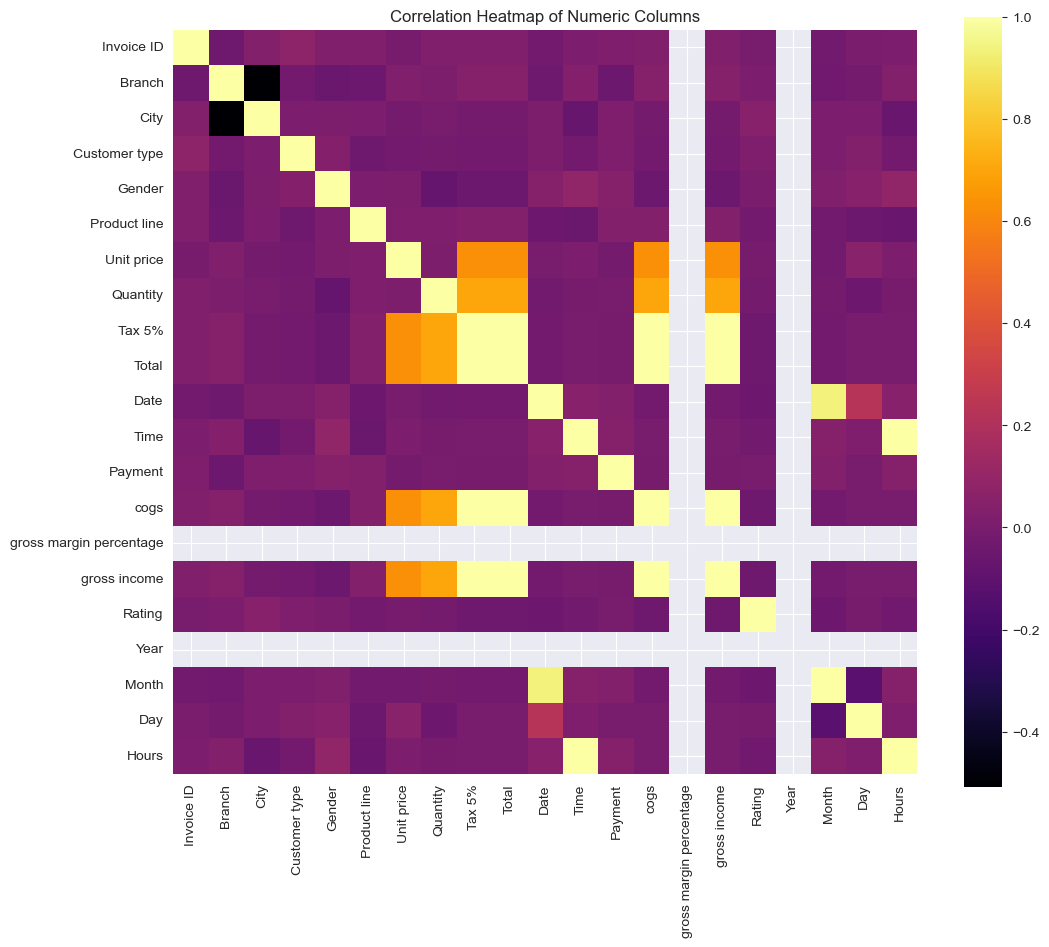

In [56]:
labelencoder = LabelEncoder()

for column in ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Invoice ID']:
    df[column] = labelencoder.fit_transform(df[column])

numeric_columns = df.select_dtypes(include=['number']).columns
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='inferno', square=True)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


#### scaling to numerical features

In [57]:
scaler = StandardScaler()

# Select numerical columns (excluding one-hot encoded categorical columns)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [58]:
pca = PCA(n_components=2)

principal_components = pca.fit_transform(df[numerical_cols])

data_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Clustering

### 1. K-Means

In [59]:
data_for_clustering = data_pca if 'data_pca' in locals() else data

kmeans = KMeans(n_clusters=6) 
kmeans.fit(data_for_clustering)

C:\Users\kduaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kduaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



KMeans(n_clusters=6)

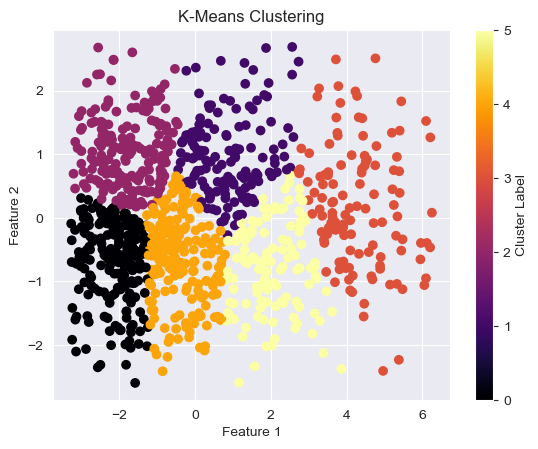

In [60]:
plt.scatter(data_for_clustering.iloc[:, 0], data_for_clustering.iloc[:, 1], c=kmeans.labels_, cmap='inferno')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

### 2. Hierarchical Clustering

In [61]:
# Generate the linkage matrix
Z = linkage(data_for_clustering, method='ward')

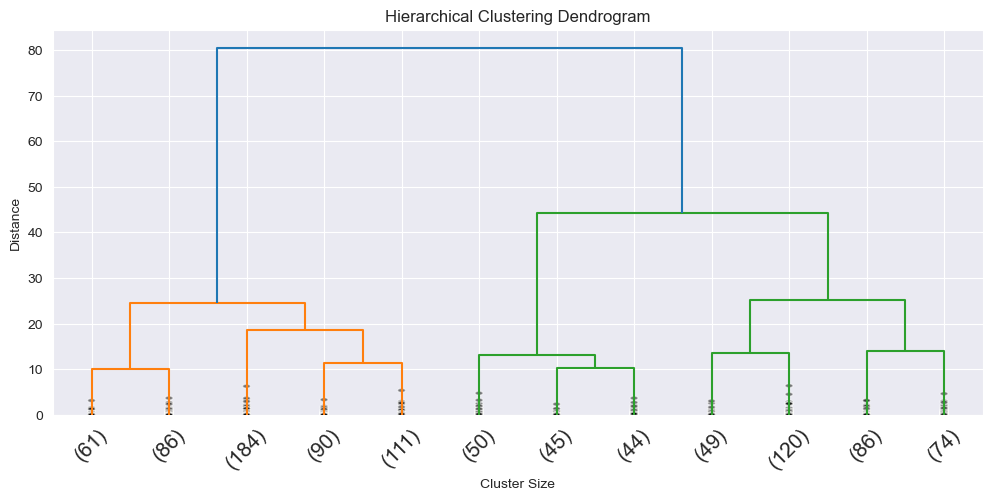

In [62]:
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [63]:
num_clusters = 4

hclust_labels = fcluster(Z, num_clusters, criterion='maxclust')

### 3. DBSCAN

In [64]:
db = DBSCAN(eps=0.6, min_samples=5)  
db.fit(data_for_clustering)

DBSCAN(eps=0.6)

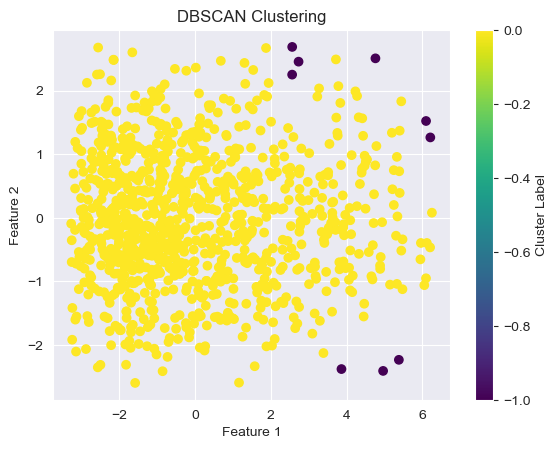

In [65]:
plt.scatter(data_for_clustering.iloc[:, 0], data_for_clustering.iloc[:, 1], c=db.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

### 4.  Mean Shift Clustering

In [66]:
ms = MeanShift()
ms.fit(data_for_clustering)

MeanShift()

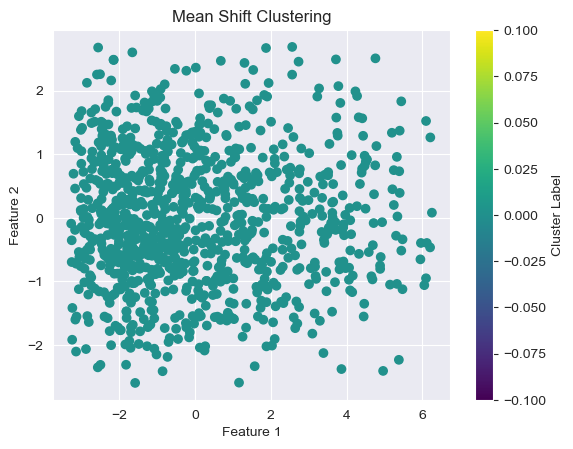

In [67]:
plt.scatter(data_for_clustering.iloc[:, 0], data_for_clustering.iloc[:, 1], c=ms.labels_, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

### 5. Gaussian Mixture Model

In [68]:
gmm = GaussianMixture(n_components=6)  
gmm.fit(data_for_clustering)
gmm_labels = gmm.predict(data_for_clustering)

C:\Users\kduaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



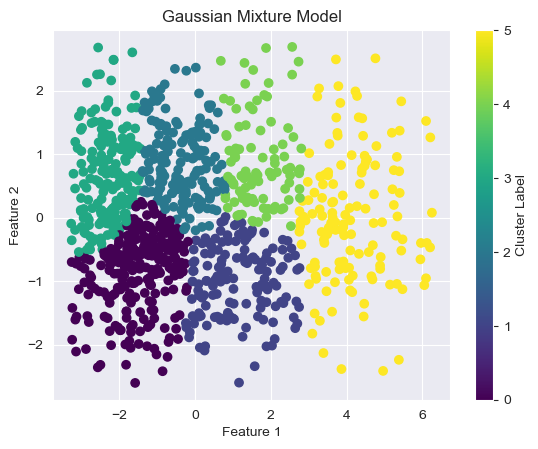

In [69]:
plt.scatter(data_for_clustering.iloc[:, 0], data_for_clustering.iloc[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [70]:
comparison_data = []
label_list = [
    ('KMeans', kmeans.labels_),
    ('Hierarchical', hclust_labels),  
    ('DBSCAN', db.labels_),
    ('MeanShift', ms.labels_),
    ('Gaussian Mixture', gmm_labels)
]

for name, labels in label_list:
    unique_labels = set(labels)
    
    # Check if only one cluster or all noise is found
    if len(unique_labels) <= 1 or (len(unique_labels) == 2 and -1 in unique_labels):
        print(f"Skipping {name}: Only one cluster or noise found.")
        continue
    
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)  
    cluster_sizes = pd.Series(labels).value_counts()
    silhouette_avg = silhouette_score(data_for_clustering, labels) if len(unique_labels) > 1 else None  

    comparison_data.append({
        'Algorithm': name,
        'Num Clusters': n_clusters,
        'Cluster Sizes': cluster_sizes.to_dict(),
        'Silhouette Score': silhouette_avg
    })

comparison_df = pd.DataFrame(comparison_data)

print(comparison_df)

Skipping DBSCAN: Only one cluster or noise found.
Skipping MeanShift: Only one cluster or noise found.
          Algorithm  Num Clusters  \
0            KMeans             6   
1      Hierarchical             4   
2  Gaussian Mixture             6   

                                      Cluster Sizes  Silhouette Score  
0  {0: 211, 4: 201, 2: 201, 1: 144, 5: 122, 3: 121}          0.346110  
1                  {1: 532, 3: 169, 4: 160, 2: 139}          0.392193  
2   {0: 260, 3: 195, 2: 166, 1: 146, 5: 138, 4: 95}          0.345421  


In [71]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Assuming df is your preprocessed DataFrame
df['YearMonth'] = df['YearMonth'].astype(str)

time_segments = sorted(df['YearMonth'].unique())

cluster_changes_over_time = []

for i, time_segment in enumerate(time_segments[:-1]):
    current_df = df[df['YearMonth'] == time_segment].copy()
    next_df = df[df['YearMonth'] == time_segments[i + 1]].copy()

    features_to_cluster_current = current_df.select_dtypes(include=[np.number])
    kmeans_current = KMeans(n_clusters=6)
    current_df['Cluster'] = kmeans_current.fit_predict(features_to_cluster_current)

    features_to_cluster_next = next_df.select_dtypes(include=[np.number])
    kmeans_next = KMeans(n_clusters=6)
    next_df['Cluster'] = kmeans_next.fit_predict(features_to_cluster_next)

    common_customers = current_df.merge(next_df, on='Time', suffixes=('_current', '_next'))

    transitions = pd.crosstab(common_customers['Cluster_current'], common_customers['Cluster_next'])

    cluster_changes_over_time.append({
        'YearMonthFrom': time_segment,
        'YearMonthTo': time_segments[i + 1],
        'TransitionMatrix': transitions
    })

    # Debugging information
    print(f"Time Segment {time_segment} has {len(current_df)} data points.")
    print(f"Time Segment {time_segments[i + 1]} has {len(next_df)} data points.")
    
    common_count = len(common_customers)
    print(f"Common customers between {time_segment} and {time_segments[i + 1]}: {common_count}")
    
    if common_count > 0:
        print("Transition Matrix:")
        print(transitions)
    else:
        print(f"No common customers between {time_segment} and {time_segments[i + 1]} to form a transition matrix.")

# Convert to DataFrame for easier viewing
cluster_changes_df = pd.DataFrame(cluster_changes_over_time)

print(cluster_changes_df)

C:\Users\kduaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kduaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kduaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kduaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Time Segment 2019-01 has 352 data points.
Time Segment 2019-02 has 303 data points.
Common customers between 2019-01 and 2019-02: 183
Transition Matrix:
Cluster_next     0  1  2   3  4  5
Cluster_current                   
0                9  5  5  10  6  7
1                9  3  5   7  7  6
2                4  6  1   8  4  2
3                6  3  1   5  4  2
4                3  6  2   6  3  4
5                6  2  2   9  9  6


C:\Users\kduaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kduaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kduaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kduaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Time Segment 2019-02 has 303 data points.
Time Segment 2019-03 has 345 data points.
Common customers between 2019-02 and 2019-03: 153
Transition Matrix:
Cluster_next     0  1  2  3  4  5
Cluster_current                  
0                6  5  3  1  2  4
1                7  2  3  3  6  8
2                1  3  1  2  2  2
3                8  6  5  2  2  8
4                4  3  7  7  2  8
5                6  7  2  7  3  5
  YearMonthFrom YearMonthTo                                   TransitionMatrix
0       2019-01     2019-02  Cluster_next     0  1  2   3  4  5
Cluster_cur...
1       2019-02     2019-03  Cluster_next     0  1  2  3  4  5
Cluster_curr...


# Classification

### Binning

In [72]:
df2 = pd.read_csv('supermarket_sales.csv')

In [73]:
df2 = df2.rename(columns={'Total': 'NewTotal'})

In [74]:
df = pd.concat([df, df2['NewTotal']], axis=1)

In [75]:
df

Invoice ID  Branch  City  Customer type  Gender  Product line  \
0           814       0     2              0       0             3   
1           142       2     1              1       0             0   
2           653       0     2              1       1             4   
3            18       0     2              0       1             3   
4           339       0     2              1       1             5   
..          ...     ...   ...            ...     ...           ...   
995         153       2     1              1       1             3   
996         250       1     0              1       0             4   
997         767       0     2              0       1             2   
998         308       0     2              1       1             4   
999         935       0     2              0       0             1   

     Unit price  Quantity    Tax 5%     Total  ...      cogs  \
0      0.718160  0.509930  0.919607  0.919607  ...  0.919607   
1     -1.525303 -0.174540 -0.987730 -0.987730  ... -0.987730   
2     -0.352781  0.509930  0.071446  0.071446  ...  0.071446   
3      0.096214  0.852165  0.675780  0.675780  ...  0.675780   
4      1.156959  0.509930  1.267125  1.267125  ...  1.267125   
..          ...       ...       ...       ...  ...       ...   
995   -0.578600 -1.543480 -1.141750 -1.141750  ... -1.141750   
996    1.574989  1.536635  2.846340  2.846340  ...  2.846340   
997   -0.899958 -1.543480 -1.178109 -1.178109  ... -1.178109   
998    0.383208 -1.543480 -1.032932 -1.032932  ... -1.032932   
999    1.233617  0.509930  1.327837  1.327837  ...  1.327837   

     gross margin percentage  gross income    Rating  Year  Month  Day  Hours  \
0                        0.0      0.919607  1.238443  2019      1    5     13   
1                        0.0     -0.987730  1.529527  2019      3    8     10   
2                        0.0      0.071446  0.248760  2019      3    3     13   
3                        0.0      0.675780  0.830927  2019      1   27     20   
4                        0.0      1.267125 -0.973790  2019      2    8     10   
..                       ...           ...       ...   ...    ...  ...    ...   
995                      0.0     -1.141750 -0.449840  2019      1   29     13   
996                      0.0      2.846340 -1.497741  2019      3    2     17   
997                      0.0     -1.178109  0.423410  2019      2    9     13   
998                      0.0     -1.032932 -1.672391  2019      2   22     15   
999                      0.0      1.327837 -0.216974  2019      2   18     13   

     YearMonth   NewTotal  
0      2019-01   548.9715  
1      2019-03    80.2200  
2      2019-03   340.5255  
3      2019-01   489.0480  
4      2019-02   634.3785  
..         ...        ...  
995    2019-01    42.3675  
996    2019-03  1022.4900  
997    2019-02    33.4320  
998    2019-02    69.1110  
999    2019-02   649.2990  

[1000 rows x 23 columns]

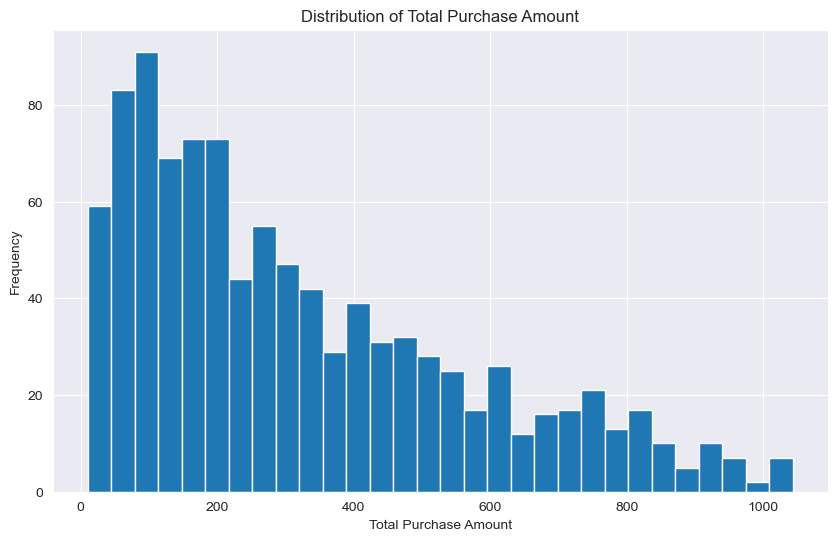

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: NewTotal, dtype: float64


In [76]:
plt.figure(figsize=(10, 6))
df['NewTotal'].hist(bins=30)
plt.title('Distribution of Total Purchase Amount')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.show()

print(df['NewTotal'].describe())

In [77]:
low_high_cutoff = df['NewTotal'].quantile(0.33)  
medium_high_cutoff = df['NewTotal'].quantile(0.66)  

bins = [0, low_high_cutoff, medium_high_cutoff, float('inf')]
bin_labels = ['Low', 'Medium', 'High']

df['CustomerSegment'] = pd.cut(df['NewTotal'], bins=bins, labels=bin_labels, include_lowest=True)

In [78]:
segment_counts = df['CustomerSegment'].value_counts()
print(segment_counts)

CustomerSegment
High      340
Low       330
Medium    330
Name: count, dtype: int64


In [79]:
df

Invoice ID  Branch  City  Customer type  Gender  Product line  \
0           814       0     2              0       0             3   
1           142       2     1              1       0             0   
2           653       0     2              1       1             4   
3            18       0     2              0       1             3   
4           339       0     2              1       1             5   
..          ...     ...   ...            ...     ...           ...   
995         153       2     1              1       1             3   
996         250       1     0              1       0             4   
997         767       0     2              0       1             2   
998         308       0     2              1       1             4   
999         935       0     2              0       0             1   

     Unit price  Quantity    Tax 5%     Total  ...  gross margin percentage  \
0      0.718160  0.509930  0.919607  0.919607  ...                      0.0   
1     -1.525303 -0.174540 -0.987730 -0.987730  ...                      0.0   
2     -0.352781  0.509930  0.071446  0.071446  ...                      0.0   
3      0.096214  0.852165  0.675780  0.675780  ...                      0.0   
4      1.156959  0.509930  1.267125  1.267125  ...                      0.0   
..          ...       ...       ...       ...  ...                      ...   
995   -0.578600 -1.543480 -1.141750 -1.141750  ...                      0.0   
996    1.574989  1.536635  2.846340  2.846340  ...                      0.0   
997   -0.899958 -1.543480 -1.178109 -1.178109  ...                      0.0   
998    0.383208 -1.543480 -1.032932 -1.032932  ...                      0.0   
999    1.233617  0.509930  1.327837  1.327837  ...                      0.0   

     gross income    Rating  Year  Month  Day  Hours  YearMonth   NewTotal  \
0        0.919607  1.238443  2019      1    5     13    2019-01   548.9715   
1       -0.987730  1.529527  2019      3    8     10    2019-03    80.2200   
2        0.071446  0.248760  2019      3    3     13    2019-03   340.5255   
3        0.675780  0.830927  2019      1   27     20    2019-01   489.0480   
4        1.267125 -0.973790  2019      2    8     10    2019-02   634.3785   
..            ...       ...   ...    ...  ...    ...        ...        ...   
995     -1.141750 -0.449840  2019      1   29     13    2019-01    42.3675   
996      2.846340 -1.497741  2019      3    2     17    2019-03  1022.4900   
997     -1.178109  0.423410  2019      2    9     13    2019-02    33.4320   
998     -1.032932 -1.672391  2019      2   22     15    2019-02    69.1110   
999      1.327837 -0.216974  2019      2   18     13    2019-02   649.2990   

     CustomerSegment  
0               High  
1                Low  
2             Medium  
3               High  
4               High  
..               ...  
995              Low  
996             High  
997              Low  
998              Low  
999             High  

[1000 rows x 24 columns]

#### Data Preparation

### Train Test Split

In [80]:
X = df.drop(['CustomerSegment', 'YearMonth'], axis=1)  # Features
y = df['CustomerSegment']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [81]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

### Model Evaluation

In [82]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.99      1.00      0.99        74
         Low       1.00      1.00      1.00        63
      Medium       1.00      0.98      0.99        63

    accuracy                           0.99       200
   macro avg       1.00      0.99      1.00       200
weighted avg       1.00      0.99      0.99       200



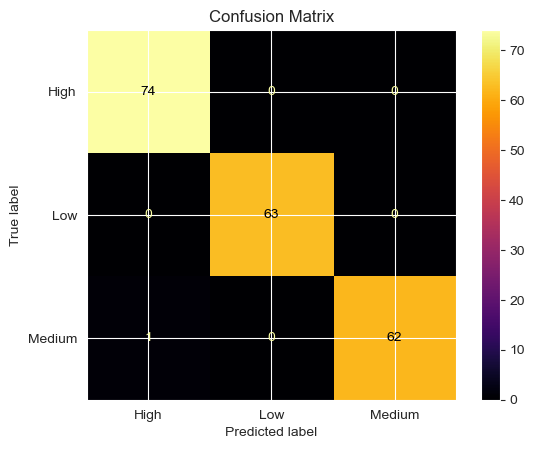

In [83]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot(cmap='inferno')
plt.title('Confusion Matrix')
plt.show()

# Regression

In [84]:
label_encoder = LabelEncoder()

df['YearMonth'] = label_encoder.fit_transform(df['YearMonth'])
df['CustomerSegment'] = label_encoder.fit_transform(df['CustomerSegment'])

# Store the mapping of original text values to numeric labels
year_month_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
customer_segment_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

print("YearMonth Mapping to Labels:")
print(year_month_mapping)

print("CustomerSegment Mapping to Labels:")
print(customer_segment_mapping)

YearMonth Mapping to Labels:
{0: 'High', 1: 'Low', 2: 'Medium'}
CustomerSegment Mapping to Labels:
{0: 'High', 1: 'Low', 2: 'Medium'}


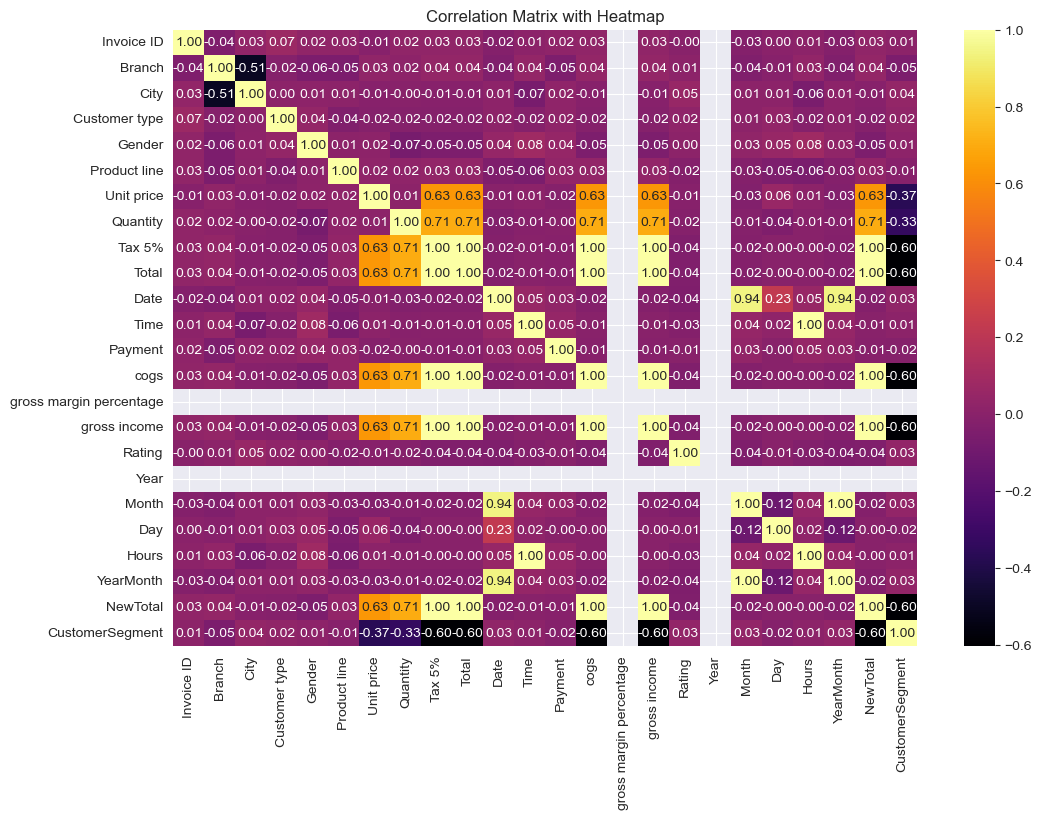

Correlations with Total Purchase Amount:
NewTotal                   1.000000
cogs                       1.000000
Total                      1.000000
Tax 5%                     1.000000
gross income               1.000000
Quantity                   0.705510
Unit price                 0.633962
Branch                     0.041047
Product line               0.031621
Invoice ID                 0.027277
Day                       -0.002515
Hours                     -0.002770
Time                      -0.005188
Payment                   -0.012434
City                      -0.012812
Customer type             -0.019670
YearMonth                 -0.022301
Month                     -0.022301
Date                      -0.022899
Rating                    -0.036442
Gender                    -0.049451
CustomerSegment           -0.602781
gross margin percentage         NaN
Year                            NaN
Name: NewTotal, dtype: float64


In [86]:
correlation_matrix = df.corr()

total_correlation = correlation_matrix['NewTotal'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlation Matrix with Heatmap')
plt.show()

# Print correlations of 'Total' with other variables
print("Correlations with Total Purchase Amount:")
print(total_correlation)

### Train Test Split

In [87]:
X = df.drop('Total', axis=1)  # Features
y = df['Total']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training Model

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [89]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.537976695838184e-31
R-squared: 1.0


# Outlier Detection & Statistical Validation

In [90]:
z_scores = np.abs(df.apply(zscore))

threshold = 0.5

outliers = np.where(z_scores > threshold)

outlier_entries = []

for outlier in zip(outliers[0], outliers[1]):
    idx, col = outlier
    outlier_entries.append({
        'Row': idx,
        'Column': df.columns[col],
        'Value': df.iloc[idx, col],
        'Z-Score': z_scores.iloc[idx, col]
    })

outlier_data = pd.DataFrame(outlier_entries)

print(outlier_data)

       Row           Column       Value   Z-Score
0        0       Invoice ID  814.000000  1.089461
1        0           Branch    0.000000  1.208970
2        0             City    2.000000  1.210174
3        0    Customer type    0.000000  0.998002
4        0           Gender    0.000000  0.998002
...    ...              ...         ...       ...
16018  999             cogs    1.327837  1.327837
16019  999     gross income    1.327837  1.327837
16020  999            Hours   13.000000  0.599637
16021  999         NewTotal  649.299000  1.327837
16022  999  CustomerSegment    0.000000  1.209568

[16023 rows x 4 columns]


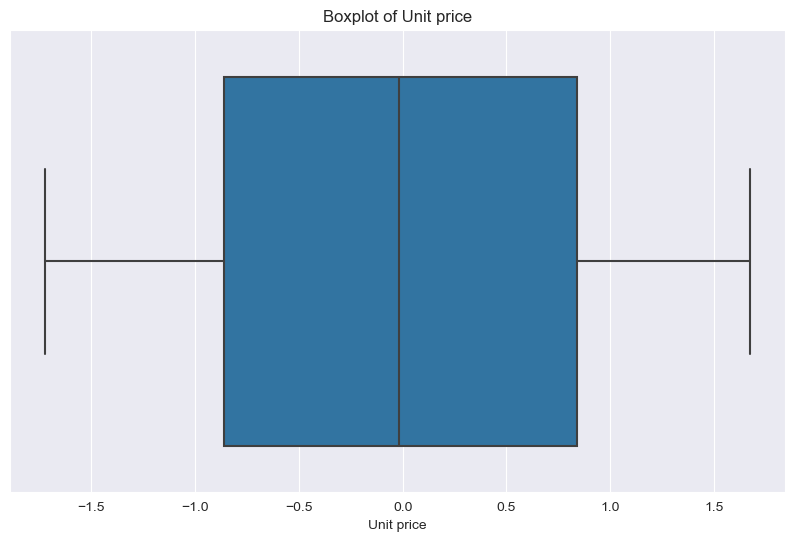

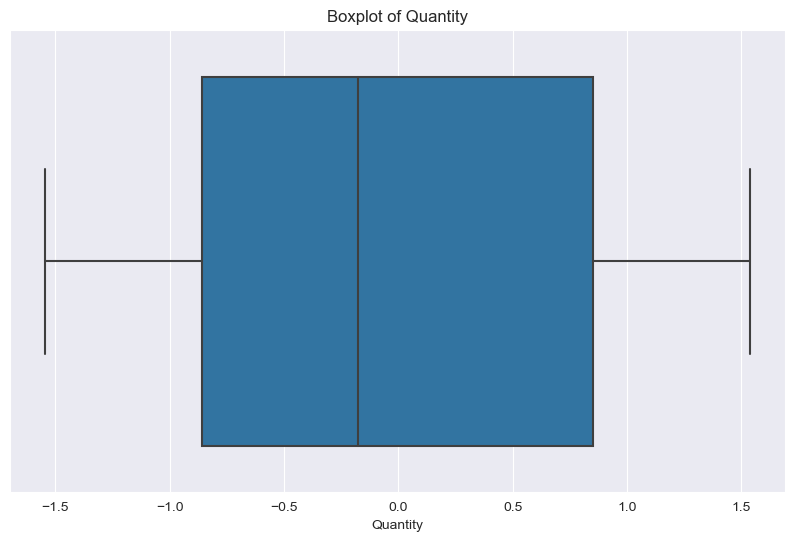

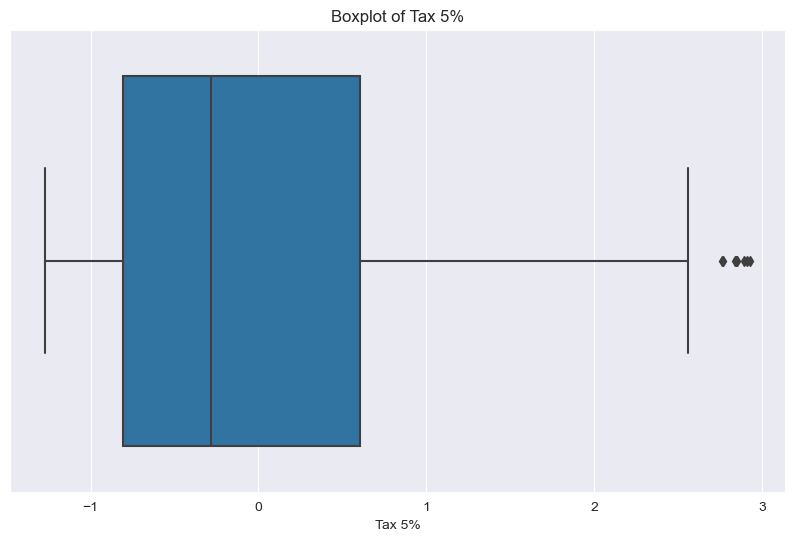

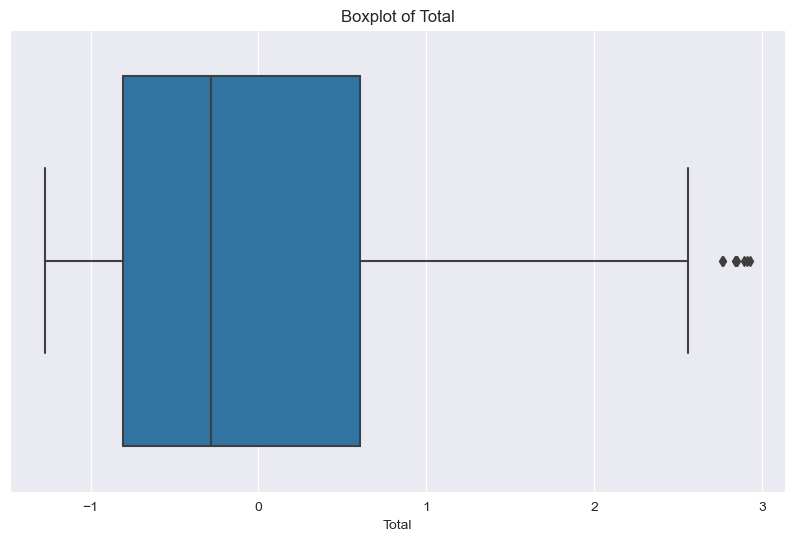

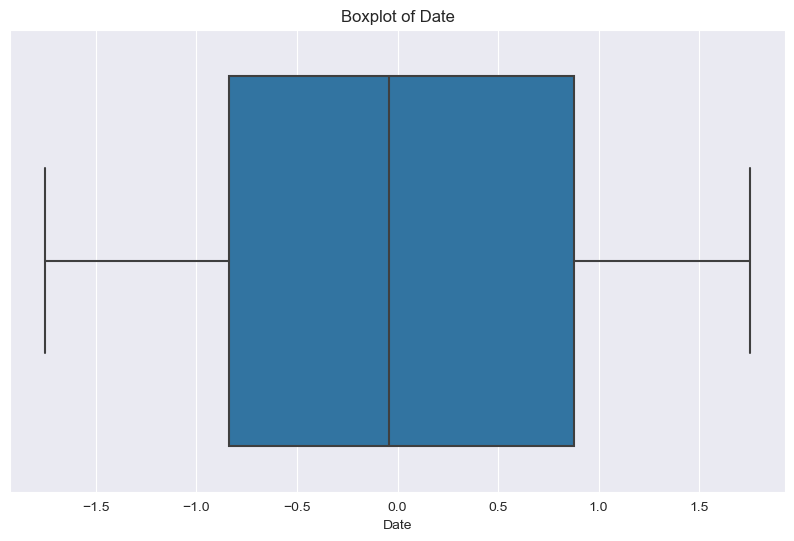

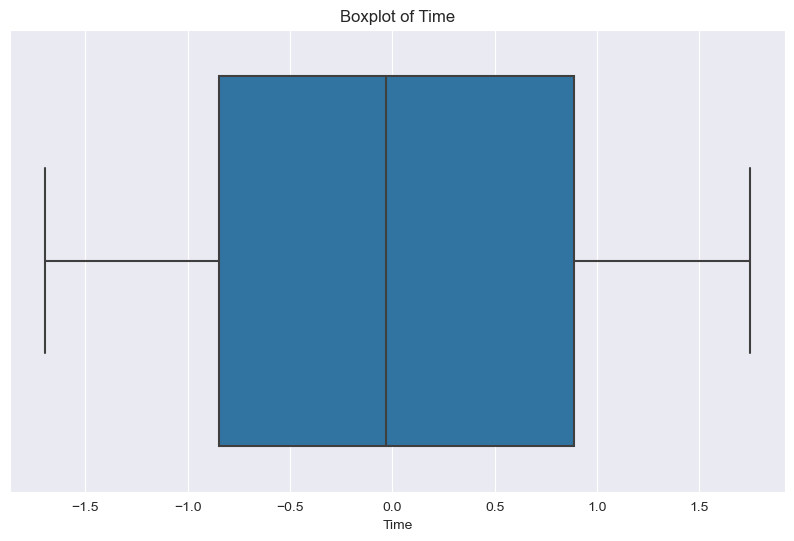

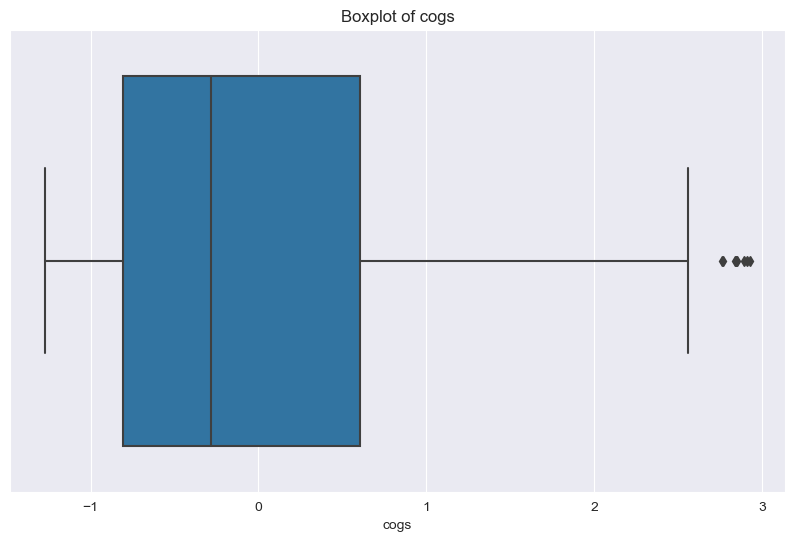

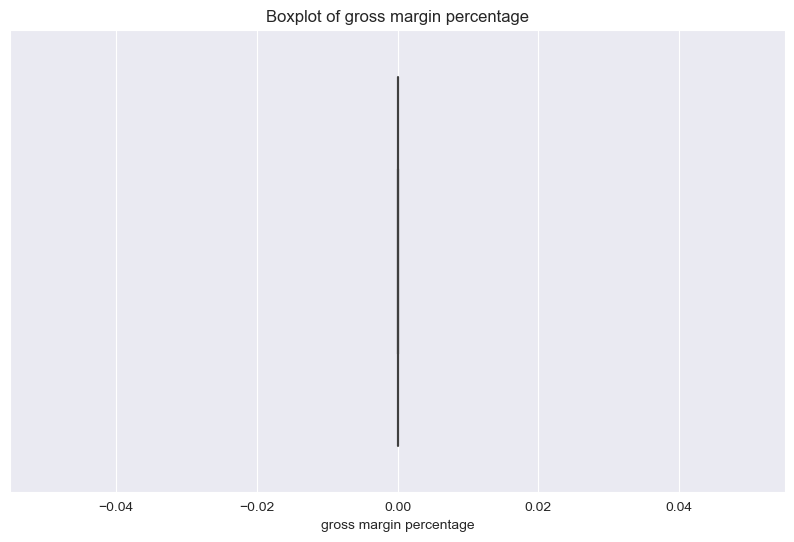

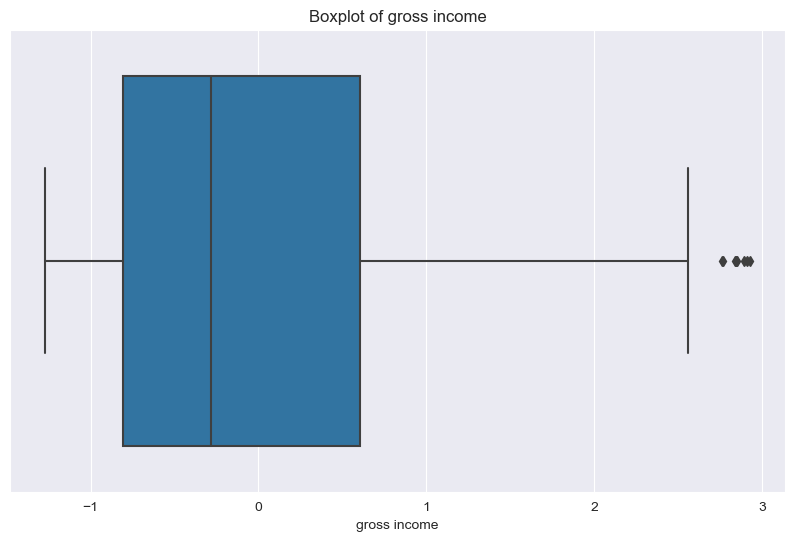

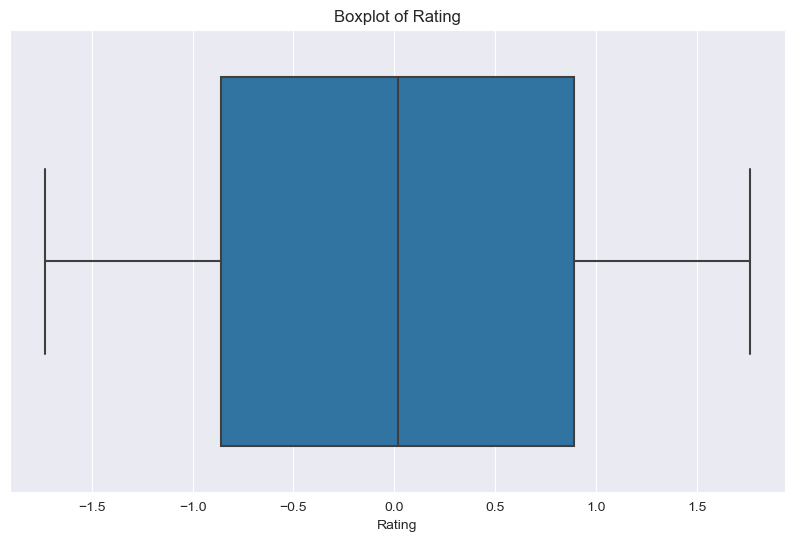

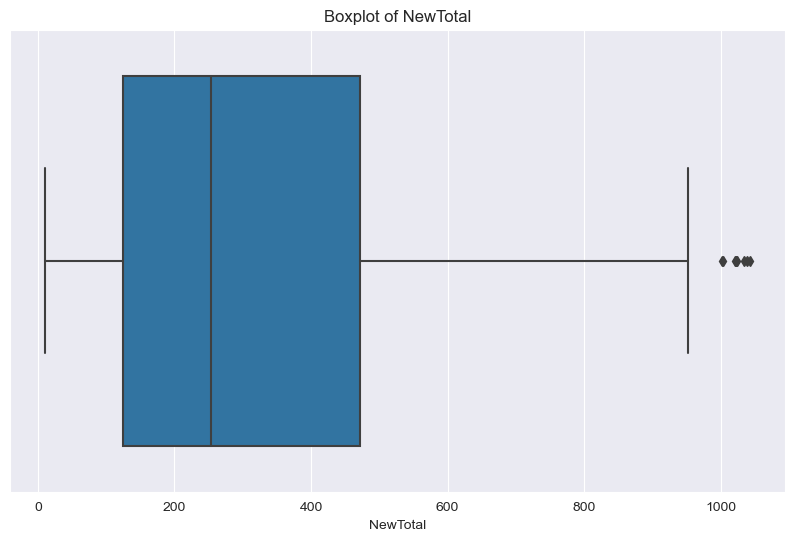

In [91]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns  
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

C:\Users\kduaa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



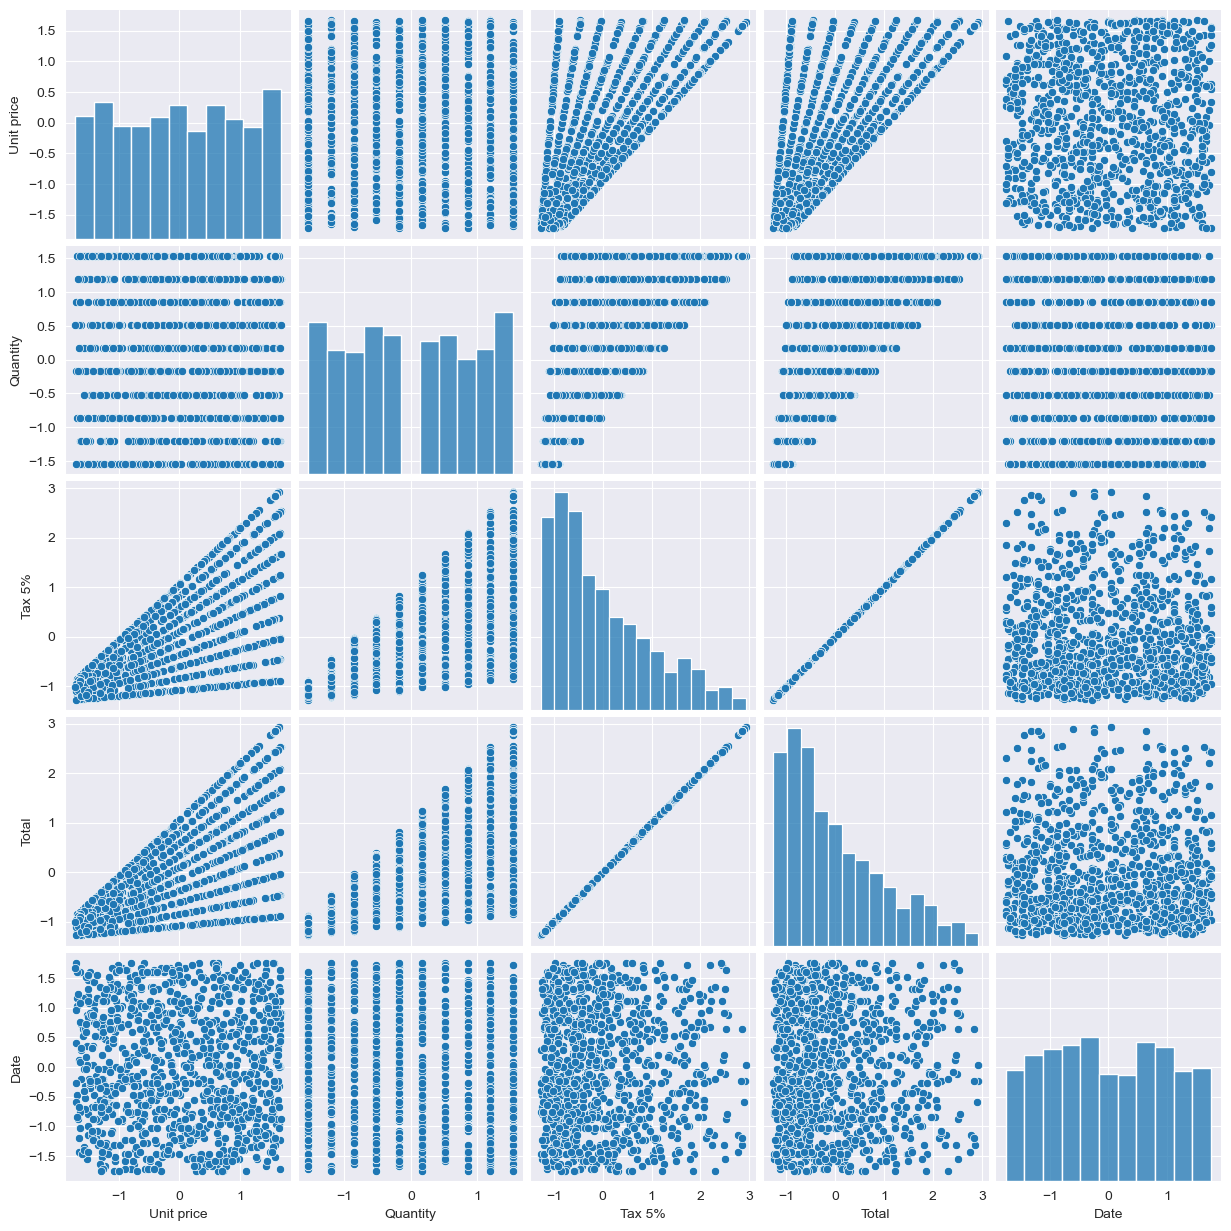

In [92]:
subset_num_cols = num_cols[:5]  
sns.pairplot(df[subset_num_cols])
plt.show()

In [93]:
grouped_data = df.groupby('Product line')['Total']

In [94]:
groups = [group for name, group in grouped_data]

f_stat, p_val = f_oneway(*groups)

print(f"F-Statistic: {f_stat}, P-value: {p_val}")

F-Statistic: 0.33796475446188035, P-value: 0.8900398045912835


#### F-Statistics: ratio of the variance between the group means to the variance within the groups
#### P-Value: probability of the observed F-statistic under the null hypothesis

In [95]:
# Conduct Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=df['Total'],     # Data
                                  groups=df['Product line'],   # Groups
                                  alpha=0.05)           # Significance level

# Display results
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0592  0.994  -0.366 0.2477  False
     0      2   0.0124    1.0 -0.2962 0.3209  False
     0      3   0.0163    1.0 -0.3031 0.3357  False
     0      4   0.0692  0.989  -0.246 0.3844  False
     0      5   0.0506 0.9974 -0.2616 0.3628  False
     1      2   0.0715 0.9852 -0.2335 0.3766  False
     1      3   0.0755 0.9839 -0.2405 0.3915  False
     1      4   0.1284 0.8484 -0.1834 0.4401  False
     1      5   0.1098  0.913  -0.199 0.4185  False
     2      3    0.004    1.0 -0.3137 0.3216  False
     2      4   0.0568 0.9955 -0.2566 0.3702  False
     2      5   0.0382 0.9993 -0.2722 0.3487  False
     3      4   0.0529 0.9973 -0.2712  0.377  False
     3      5   0.0343 0.9996  -0.287 0.3555  False
     4      5  -0.0186    1.0 -0.3356 0.2984  False
---------------------------------------------------


In [96]:
members = df[df['Customer type'] == 'Member']['Total']
non_members = df[df['Customer type'] == 'Normal']['Total']

t_stat, p_val = ttest_ind(members, non_members)

# Interpret results
alpha = 0.05  # significance level
if p_val < alpha:
    print(f"Reject H0: There is a significant difference in total spending between members and non-members (p={p_val})")
else:
    print(f"Fail to reject H0: No significant difference in total spending between members and non-members (p={p_val})")


Fail to reject H0: No significant difference in total spending between members and non-members (p=nan)
